# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Here we get our **training**, **validation**, and **test** sets from the pickle files `train.p`, `valid.p`, and `test.p` that we downloaded, I have them in the `traffic-signs-data` directory. 

**NOTE:** Please make sure to download the files and place them in the `traffic-signs-data` folder or point to them in the code below  to be able to execute the notebook correctly.

In [39]:
# Load pickled data
import pickle
import tensorflow as tf
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [40]:
print(X_train[0].shape)

(32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [41]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
# The length of the X_train
n_train = len(X_train)

# Number of validation examples
# The length of the X_valid
n_validation = len(X_valid)

# Number of testing examples.
# The length of the X_test
n_test = len(X_test)

# What's the shape of a traffic sign image?
# Get the shape of the fist element
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
# Just convert the y_train (classes) to a Set to get the number of unique classes
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of Validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of Validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Extras to the Notebook

We'll be writing a lot of code in this notebook, so to keep everything nice and clean we'll be adding most of our code to utility and other modules that'll be used in this notebook. 

External files that will be used in this notebook are: 

* [`utils.py`](utils.py)
* [`datasetclasses.py`](datasetclasses.py)
* [`imageutils.py`](imageutils.py)

We'll also be working with some images that will be stored in `assets` folder.

Let's import our modules to get the fun started.

In [42]:
# Importing all external modules
import utils
import datasetclasses
import imageutils
import time

### Creating a `Dataset` object to hold the dataset

Here we create a `Dataset` object that we'll be using throughout this notebook to deal with our traffic signs dataset.
The `Dataset` class will facilitate the way we deal with our data and it pack our interaction with our dataset in neat and modular way.


In [43]:
import pandas as pd
# Creating Dataset object and initializing it with our dataset components
dataset = datasetclasses.Dataset(X_train, y_train,
                                 X_valid, y_valid,
                                 X_test,
                                 y_test,
                                 'signnames.csv')

# Get labels' mapping
print("Here are our dataset's labels and their corresponding mappings: ")
pd.read_csv('signnames.csv').head(dataset.train.len)

Here are our dataset's labels and their corresponding mappings: 


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Here we get the label mapping for our data, below are some examples of out labels(signs):
* End of no passing by vehicles over 3.5 metric tons
* Road work
* Speed limit (120km/h)
* Road narrows on the right
* Turn right ahead
* Dangerous curve to the left

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [44]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

### Showing dataset images

Here we'll be showing 12 random images and their info from the training dataset

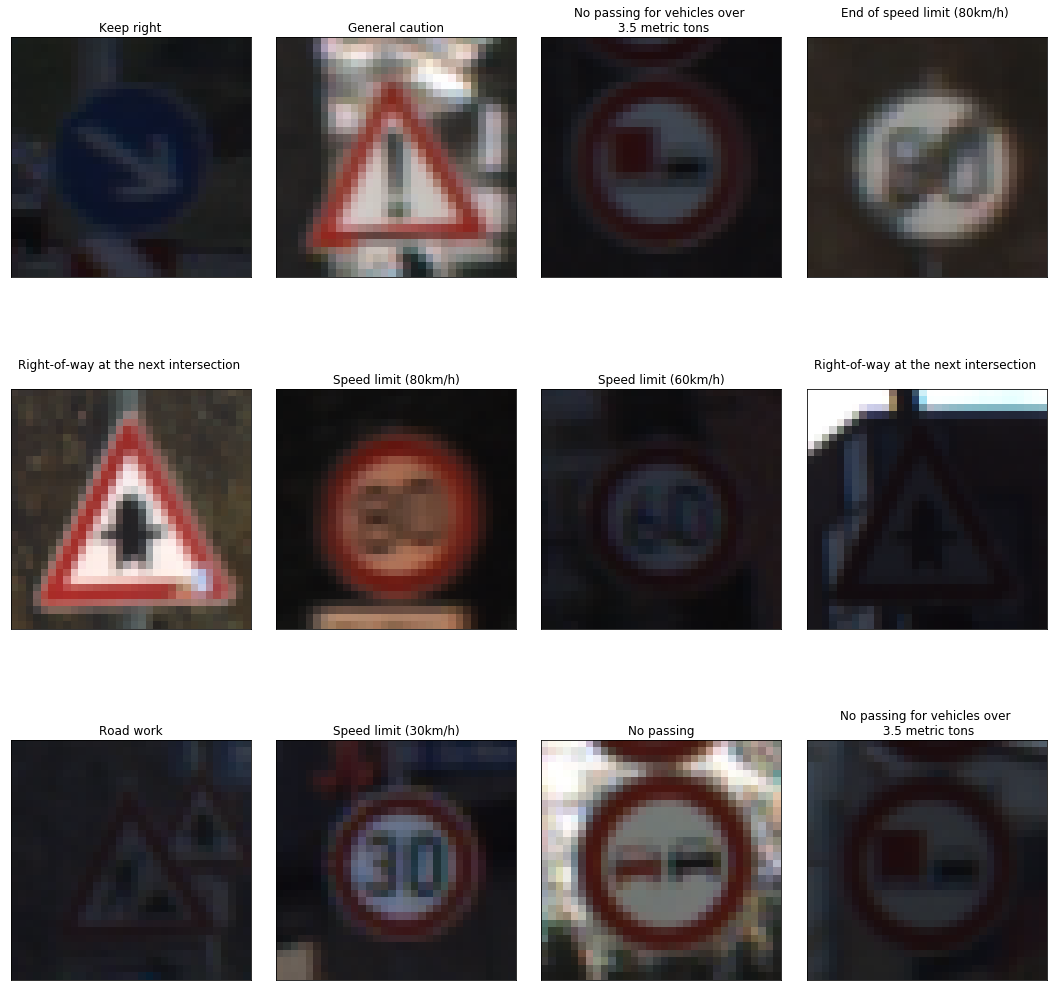

In [45]:
import random

rand_numbers = random.sample(range(0, dataset.train.len), 12)
rand_images, rand_images_labels = zip(*[(dataset.train.X[i], dataset.train.y[i]) for i in rand_numbers])
rand_images_labels = [dataset.label_mapping[str(i)] for i in rand_images_labels]
# 
utils.show_images(rand_images, rand_images_labels)

### Plotting class (label) representation in the Data

Here we plot the number of occurrences of each class (label) in the **training** dataset.

Here we'll create a `Counter()` to count the number of occurrences for each **sign (label)**

First we'll create a method to build our graph that will represent our classes and its respective counts as a **barchart**. For demos on how to build your own graphs, checkout the **`matplotlib`** examples [here](https://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html).

Draw the frequency of class labels using the utils.draw_label_counts and the dataset.train.counter property

The most common Sign is: Speed limit (50km/h) with 2011 occurences
The least common Sign is: Go straight or left with 181 occurences
That makes the overall average occurences: 810


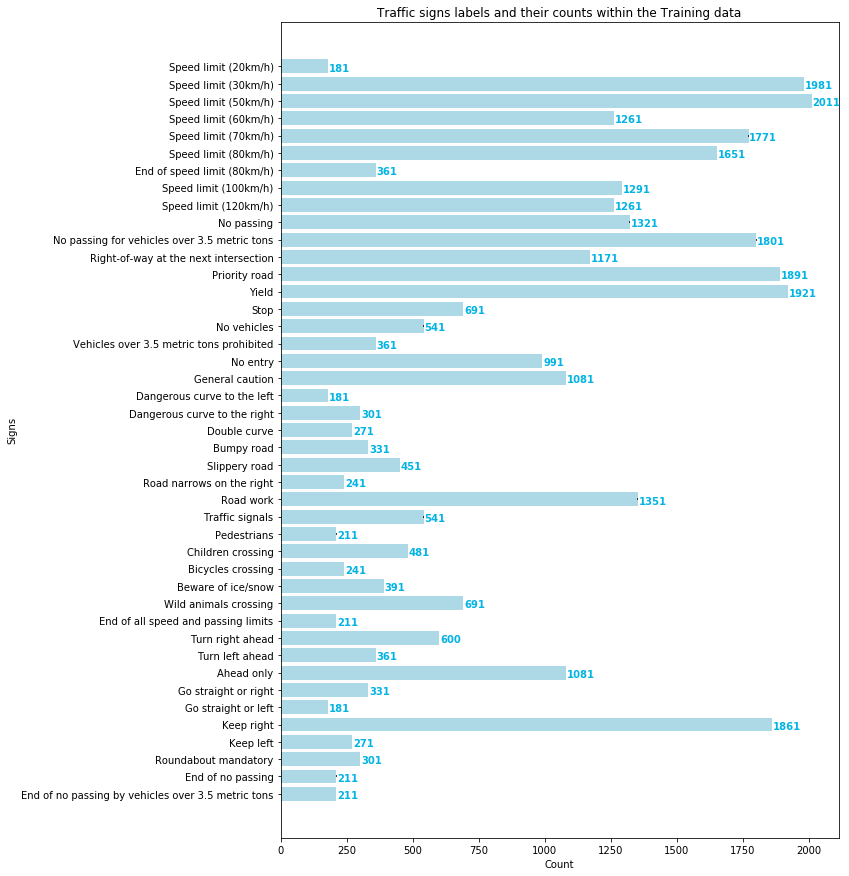

In [46]:
# Draw the frequency of class labels using the utils.draw_label_counts and the dataset.train.counter property
utils.show_label_counts_with_mapping(dataset.train.label_counter, dataset.label_mapping)

As we can see above in the graph not all signs are represented *equally* in the dataset; for example, **Speed limit (50km/h)** has the highest count of **2011** images while **Go straight or left** has the lowest count of **181**. This might make our model biased towards signs with higher image counts and maybe it wont be able to correctly classify signs with counts below 300 all the time.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Before we start with the preprocessing lets see and explore different preprocessing techniques and their effect on our dataset, here we're going to explore:

* Shuffling our dataset
* Data normalization or standardization
* Grayscaling
* Exploring contrast and brightness techniques
* Exploring image enhancement techniques
* Data Augmentation

All of our method implemetations that we'll call below are in:
* [`imageutils.py`](./imageutils.py) 
* [`utils.py`](./utils.py) 

### Shuffle shuffle
Lets show the first 12 images from our training dataset here:

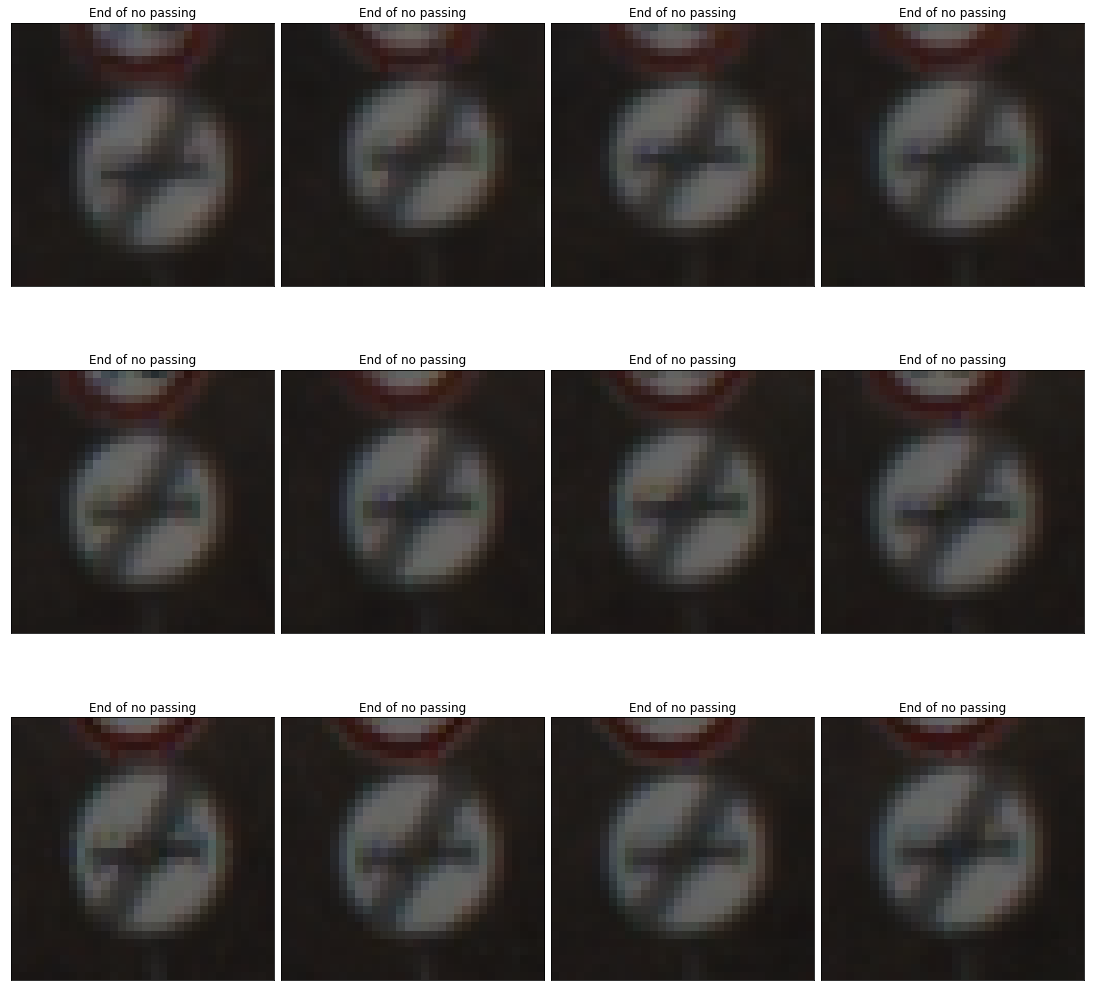

In [47]:
# First 12 images indices in the data
utils.show_images(dataset.train.X[:12], [dataset.label_mapping[str(l)] for l in dataset.train.y[:12]])

We find out that they're all representing the same sign **End of no passing** which means that our dataset is **ordered** by sign as shown above. We now need to randomly shuffle our dataset to get a more random representation of our data to improve our model training. We'll achieve this by using [`shuffle_data()`](datasetclasses.py) method in our `dateset.train` object which uses the `sklearn` utils method `shuffle()` that shuffles our training dataset *features* and *labels*.

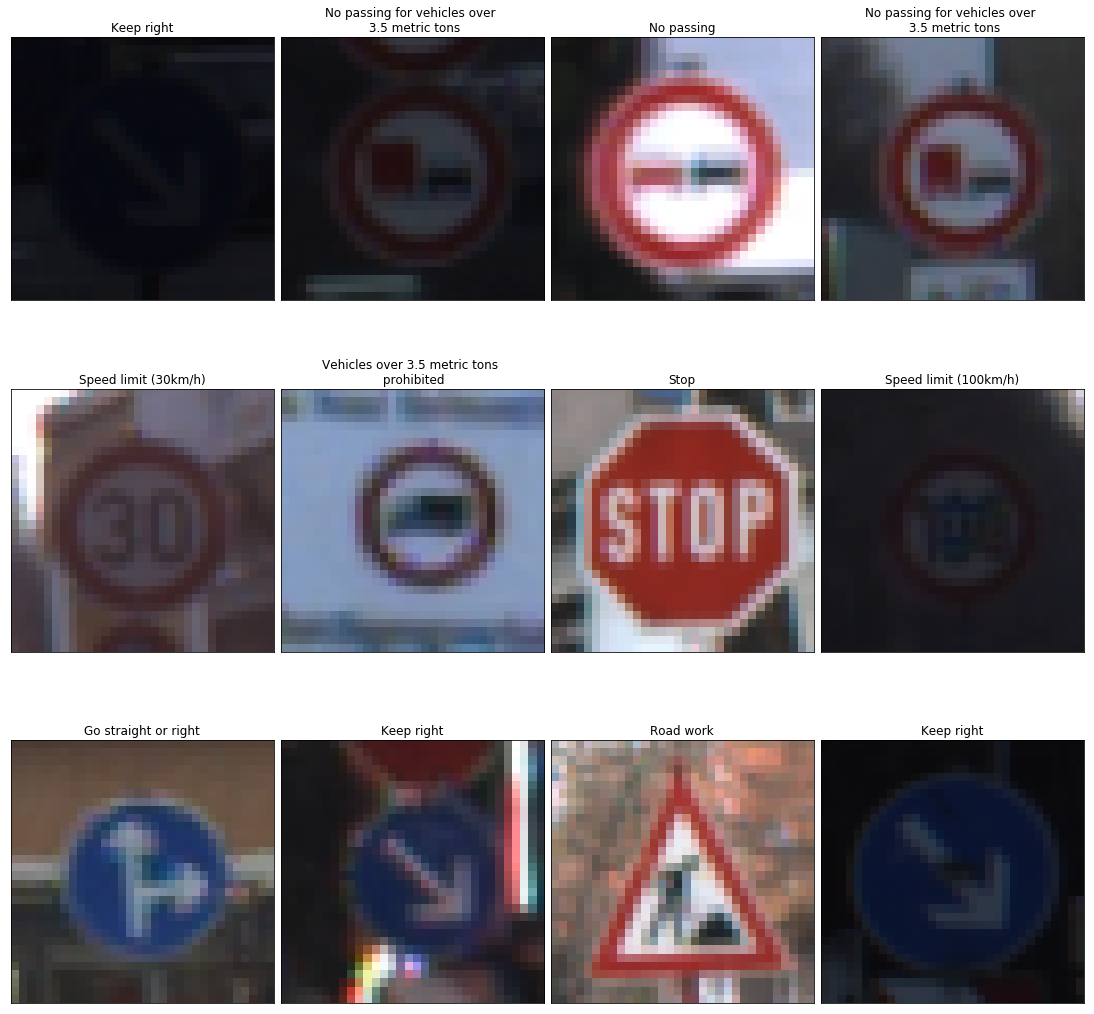

In [48]:
from sklearn.utils import shuffle
# Shuffling the training data 
dataset.train.shuffle_data()
# Creating list of the first 12 images to use in future tests
test_images_list = dataset.train.X[:12]
utils.show_images(test_images_list, [dataset.label_mapping[str(l)] for l in dataset.train.y[:12]])

As we can see here our training data was randomly shuffled which will help our model train, and this will not be the last time we see the shuffle method in this notebook.

## Normalization

Normalization or feature scaling is the last step in preprocessing our dataset, it standardizes our dataset features and bounds them to a range from [0,1], [-1,1] which helps our model execute faster due to this mathematical optimization.
Here are two ways of normalizing our data 
1. An impelementation of MINMAX which applies `(pixel - 128)/ 128` to every pixel of the image
2. Mean normalization applying `(pixel - images_mean) / images_std` to every pixel of the image


Methods: 
* [`get_images_mean`](imageutils.py)
* [`get_images_std`](imageutils.py)
* [`normalize_images`](imageutils.py)
* [`normalize_image`](imageutils.py)



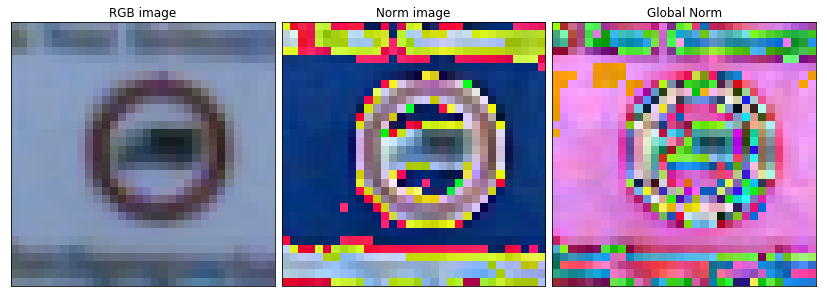

In [49]:
norm_images = imageutils.normalize_images(test_images_list)
mean,_ = imageutils.get_images_mean(test_images_list)
std = imageutils.get_images_std(test_images_list)
global_norm_images = imageutils.normalize_images(test_images_list, 
                                                 mean,
                                                 std)
i =5
utils.show_images([test_images_list[i], 
                   norm_images[i],
                   global_norm_images[i]], ['RGB image', 
                                            'Norm image',
                                            'Global Norm'], horizontal=True)

### Grayscaling the images
Lets apply grayscaling to our images using the `imageutils.convert_to_grayscale` method that not only converts to grayscale but also adds an extra dimension to the resulting `32x32` array to make it a `32x32x1`.

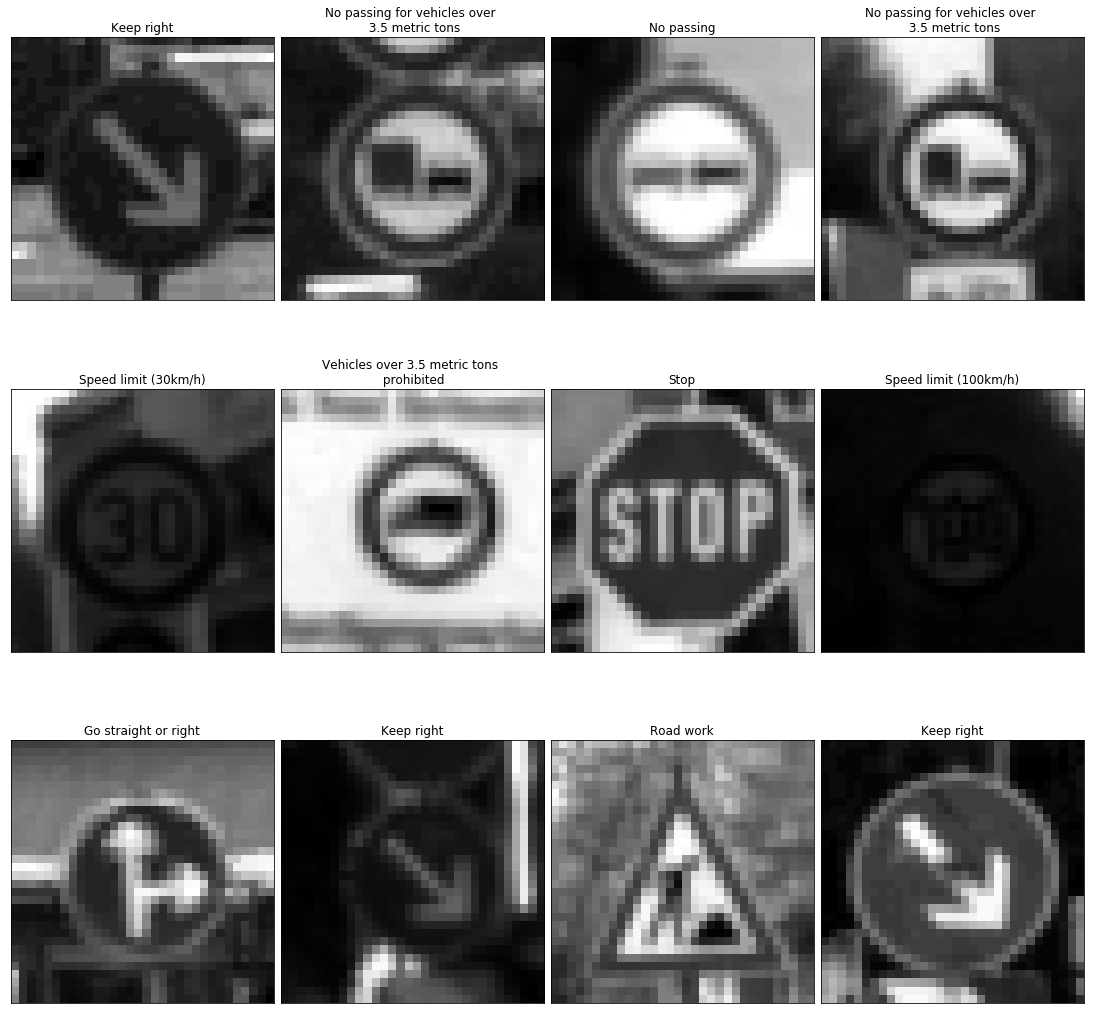

In [50]:
# Graysaling the training images
grayscale_test_images = np.array(list(map(imageutils.convert_to_gray, test_images_list)))
utils.show_images(grayscale_test_images, [dataset.label_mapping[str(l)] for l in dataset.train.y[:12]])

### Normalizing Grayscale images
Lets apply normalization to our grayscale images, here are grayscale image and the normalized versions of it side by side:

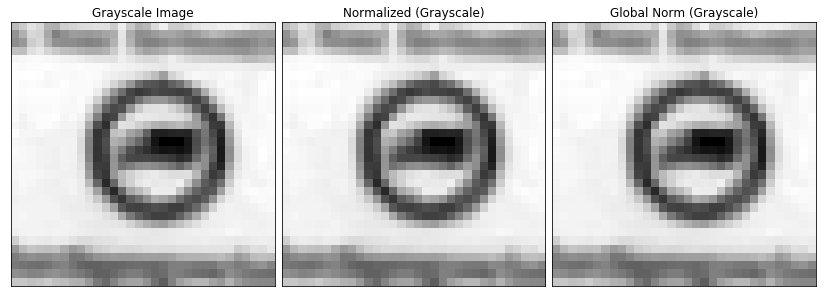

In [51]:
gray_mean, _ = imageutils.get_images_mean(grayscale_test_images )
gray_std = imageutils.get_images_std(grayscale_test_images )
norm_grayscale_test_image = imageutils.normalize_image(grayscale_test_images[5], gray_mean, gray_std)
global_norm_grayscale_test_image = imageutils.normalize_image(grayscale_test_images[5], 128., 128.)#imageutils.normalize_images([grayscale_test_images[0]])[0]
utils.show_images([grayscale_test_images[5], norm_grayscale_test_image, global_norm_grayscale_test_image],
                  ['Grayscale Image', 'Normalized (Grayscale)', 'Global Norm (Grayscale)'],
                  horizontal=True)

As we can see above that the results of the normalized grayscale image looks exactly the same with the added bonus of the numerical optimization and without any lost information or weird artifacts. Even the two methods of normalization yield the same result, so grayscale deals well with normalization; however, the image is too bright and we'll try and fix that in the following section. 

## Image Enhancements
As we've been seeing so far our images are not under the same lighting conditions some are either really dark or really bright, they can also be blurry and distorted, we need to try and enhance the images in order to help our network learn better all over.

So before we even normalize our images to feed it to our model we'll have to run some image enhancements to make sure that we have a clear enough dataset for our network to learn from. We need to fix two main issues with our images:
1. Image blur due to low quality images, motion blur, or other conditions.
2. Image lighting due to sun glare, shadows, and other environmental factors.

### Image sharpening
Let's try and enhance our image quality by sharpening its edges a little, we'll go about this by using a self made approach and using **PIL's** (Python Image Library) `ImageEnhance`.

And here are the grayscale variant:


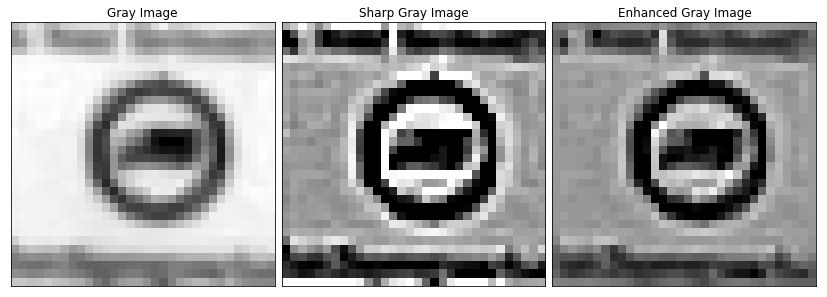

In [52]:
sharp_gray_test_image = imageutils.sharpen_image(grayscale_test_images[5])
enhanced_gray_test_image = imageutils.enhance_image(grayscale_test_images[5], 8)
print('And here are the grayscale variant:')
utils.show_images([grayscale_test_images[5], sharp_gray_test_image, enhanced_gray_test_image],
                  ['Gray Image', 'Sharp Gray Image', 'Enhanced Gray Image'],
                  horizontal=True)

(32, 32, 3)
And here are the grayscale variant:


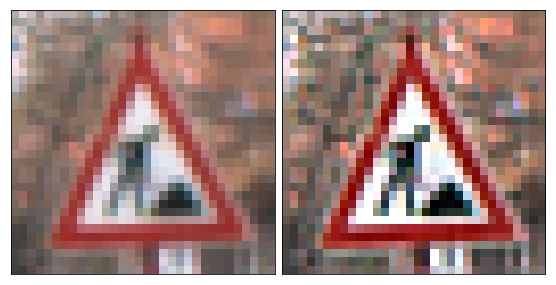

In [53]:
sharp_test_image = imageutils.sharpen_image(test_images_list[10])
enhanced_test_image = imageutils.enhance_image(test_images_list[10], 3)
print(enhanced_test_image.shape)
print('And here are the grayscale variant:')
utils.show_images([test_images_list[10], enhanced_test_image],
                  ['Gray Image', 'Sharp Gray Image', 'Enhanced Gray Image'],
                  horizontal=True)

### Image Light

Here we try to correct the image lighting by adjusting the image contrast, we'll go about this by trying out 3 different approaches which are:

* Adaptive Thresholding
* Histogram equalization
* Adaptive Histogram equalization

This will help us present data that has close exposer in order for our model to learn better.
**Note: All these techniques require the image to be grayscaled prior to impelemeting them.

### Adaptive Thresholding

Adaptive Thresholding tries to focus on the image edges to get a better repsl;kxdjfklsd jsdoijl 

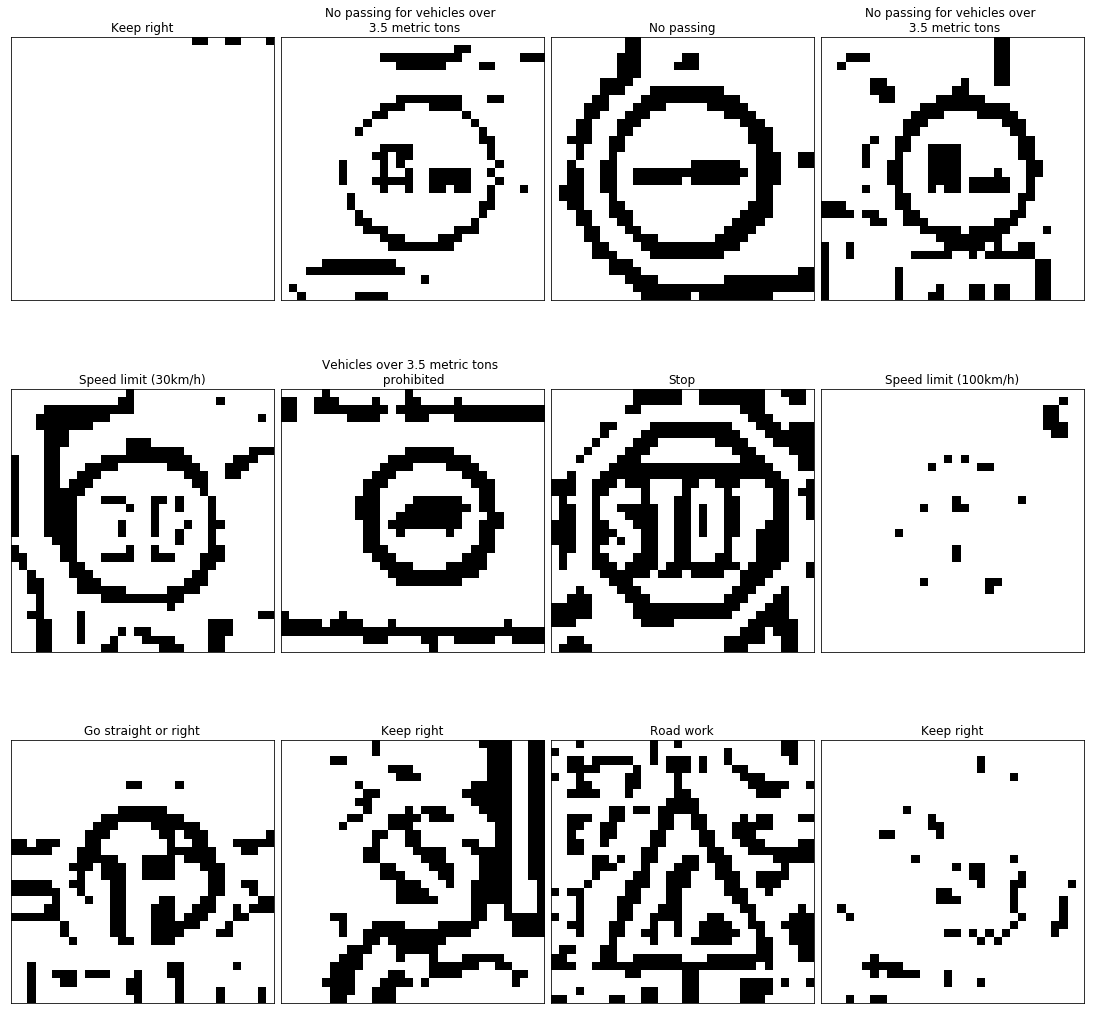

In [54]:
adaptive_test_images = list(map(imageutils.adaptive_gaussian_thresholding, grayscale_test_images))
utils.show_images(adaptive_test_images, [dataset.label_mapping[str(l)] for l in dataset.train.y[:12]])

While adaptive thresholding removes much of the original images noise and some times focuses on the desired features, it also removes a lot sign features, so lets checkout another technique that might just be the right one.

### Histogram Equalization

Histogram equalization is a technique that transforms the image to be more bright if it was dark and vise versa, this technique maps image pixels from one end of the spectrum (bright or dark) to the full range of the image. This equalization makes sure that the image make use of its full light spectrum so images appear more clear, it gives us a uniform lighting over all of the image pixels. This technique applies global contrast to each pixel and here's how it looks like:

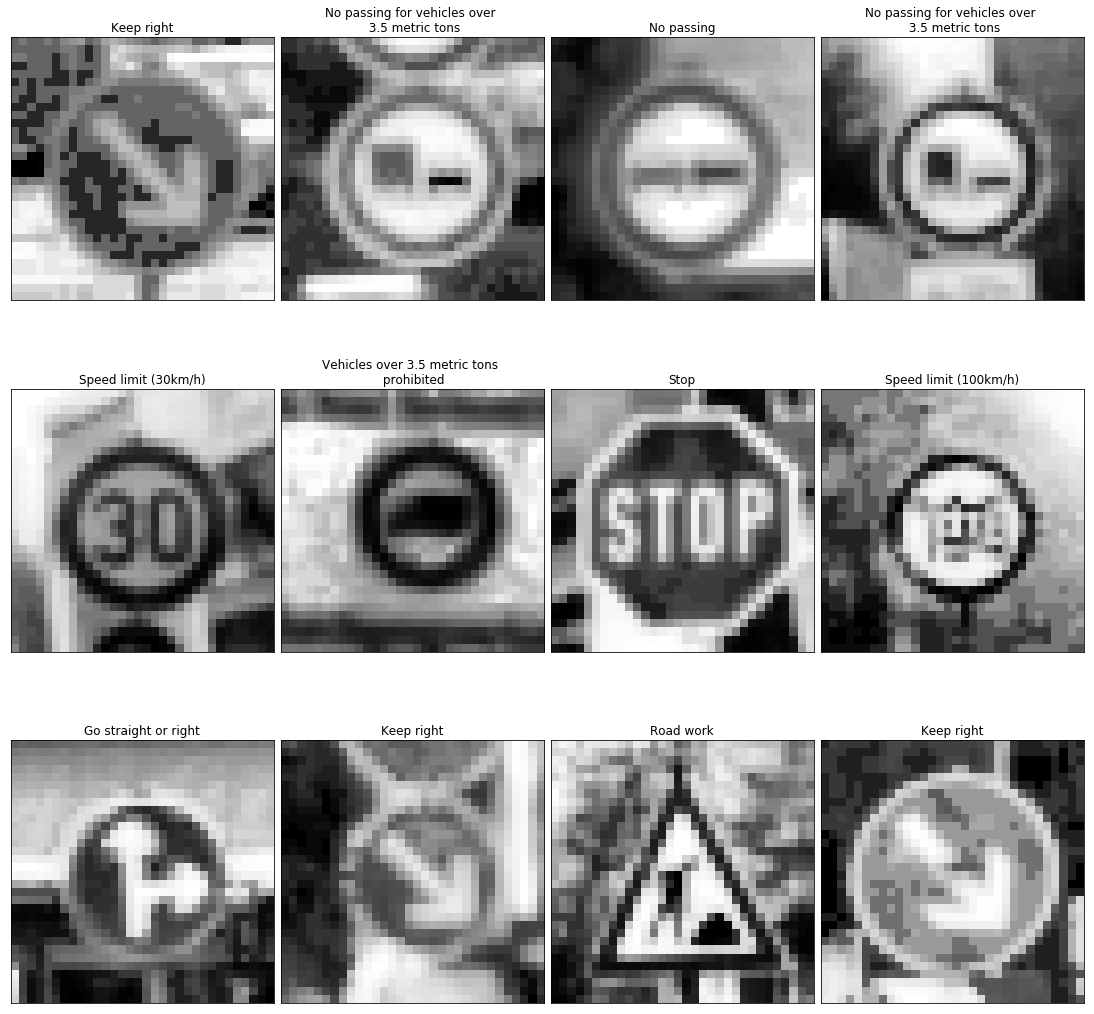

In [55]:
equalized_test_images = list(map(imageutils.histogram_equaluization, grayscale_test_images))
utils.show_images(equalized_test_images, [dataset.label_mapping[str(l)] for l in dataset.train.y[:12]])

Most of our images now appear clearer especially the low lit and low contrast ones, but in the process of lighting the images we sacrificed some of their features. Some of the images lost their definition and lost most of their information  due to over-brightness, thats why we'll be applying the **Adaptive Histogram Equalization** which is a better version of the **Histogram Equalization**.

### Adaptive Histogram Equalization (CALHE)

This is the Adaptive version of the Histogram equalization is called **CALHE** (contrast limited adaptive histogram equalization), which limits the contrast applied to each pixels by its neighboring pixels, so pixels cant be affected by really bright or dim pixels that are not even near them.

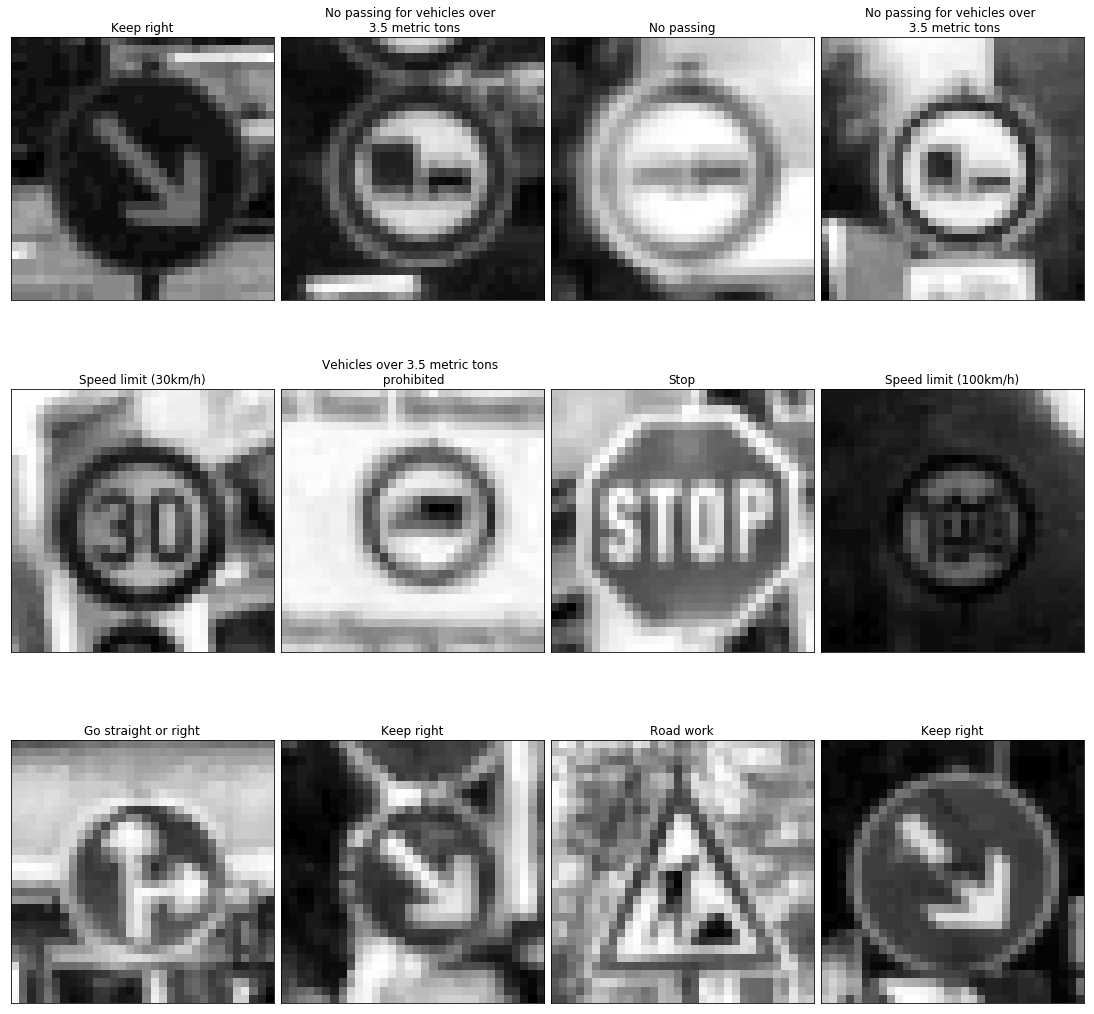

In [56]:
calhe_test_images = list(map(imageutils.adaptive_histogram_equaluization, grayscale_test_images))
utils.show_images(calhe_test_images, [dataset.label_mapping[str(l)] for l in dataset.train.y[:12]])

Now our image information is more defined, as well as having a well distributed contrast through the whole image.

**Enhancemet Conclusion:**

We conclude that using **CALHE** gives the best results in lighting and definition.

### Data Augmentation 

Our dataset is really imbalanced, it doesn't have equal label representation, some labels have more than 1500 images while others have fewer than 500 image and ones have as low as 181 images. This skewed representation will influence our model to be biased towards classifying labels as ones with higher number of images and it'll decrease the probability of correctly classifying low numbered images. In other works this will teach our model to "overfit" the higher number labels, this results in bad model generalization on all labels which will lead to poor accuracies and ultimately a bad classifier. 

In a perfect world we can solve this by getting more data, but here in reality we'll have to create our own by augmenting our existing dataset to get more versions of it. The augmentations that we'll apply should be ones that are applicable to the context of the dataset like rotate, add noise, blur, brighten, etc.. 

Here are possible real world conditions for traffic signs that we might be able to augment: 
* Low resolution images
* lighting conditions (saturations, low-contrast)
* motion-blur
* sunglare
* Shade
* physical damage
* colors fading
* graffiti 
* point of view or perspective

So Lets create our own augmentations that replicates some of the conditions listed above, we'll apply  augmentations to replecate some of the real world conditions that can affect the traffic signs. 

* `blur_image()` to replicate motion-blur from video extracted images or bad quality
* `augment_image_pov` to replicate different perspectives or points of view of the image taken
* `rotate()` to replicate physical damage or camera rotation
* `bright_dim_image` to replicate different lighting conditions
* `fade_color()` to replicate physical damage and fading paint

Below we'll be using techniques from multiple libraries and modules like `scipy.ndimage`, `openCV`, `skimage.transform`, `PIL`, and own implementation, all of these methods are implemented in the [`imageutils.py`](imageutils.py) file.

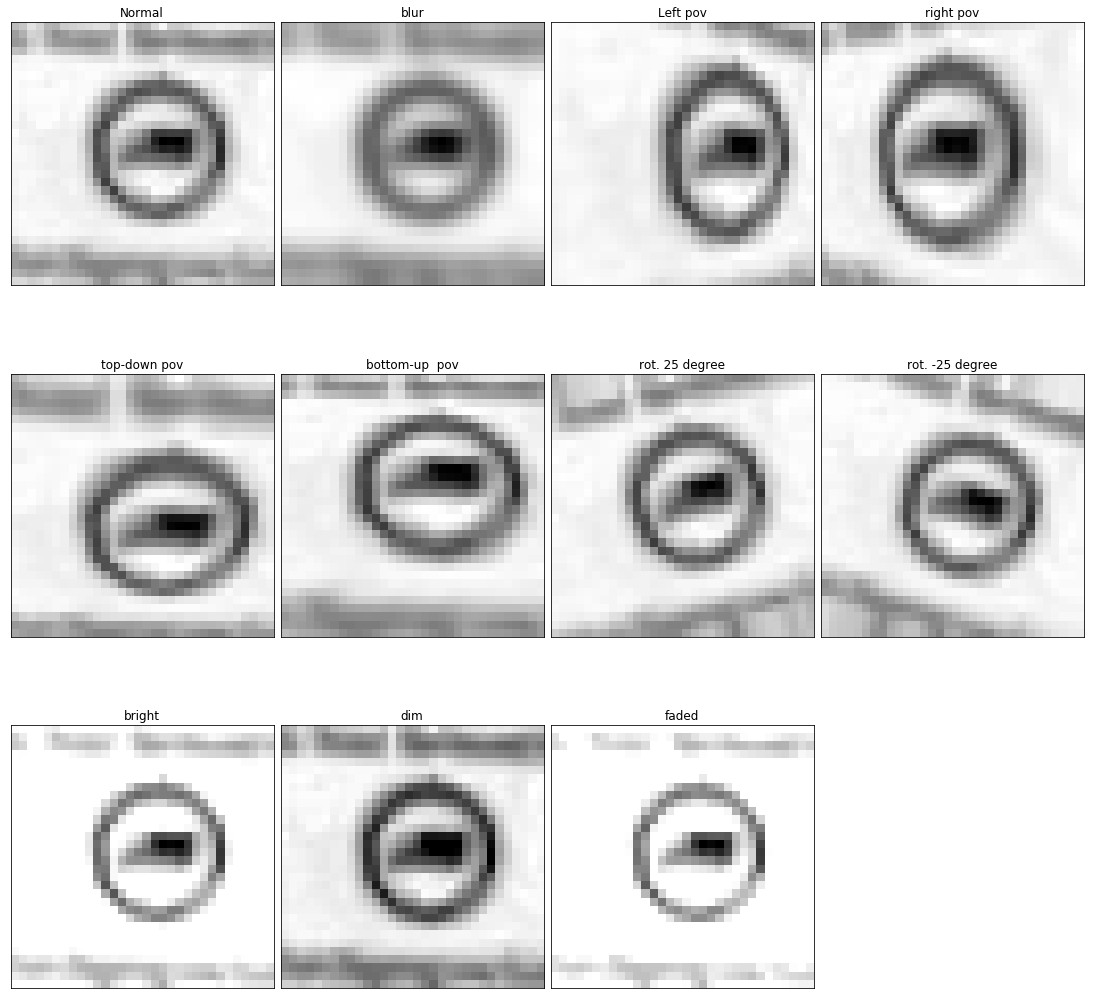

In [57]:
# Image to test on 
import importlib

importlib.reload(imageutils)
test_image = test_images_list[5]
test_image_label = dataset.label_mapping[str(y_train[5])]
calhe_test_image = calhe_test_images[5]#imageutils.enhance_image(calhe_test_image)
# plt.imshow(calhe_test_image.squeeze())
c_augmented = imageutils.apply_augmentation(calhe_test_image, apply_all= True)
# calhe_augmented = imageutils.augment_image_pov(enhanced_image)#imageutils.change_prespective(calhe_test_image, direction='left')
utils.show_images([calhe_test_image] + c_augmented,
            ['Normal',
             'blur',
             'Left pov',
             'right pov', 
             'top-down pov', 
             'bottom-up  pov',
             'rot. 25 degree',
             'rot. -25 degree',
             'bright',
             'dim',
             'faded'], horizontal=True)

By applying these 10 augmentations relatively to images that need more data representation like **Speed limit (20km/h)** and **Go straight or left** we will increase their images count from **181** each to **1,991**. This addition of meaningful real world augmentations will balance our dataset skewed representation which will create a more robust traffic signs classifier.





This increase also remedies our poor dataset representation of some signs like in the case of **Dangerous curve to the left** which had **181** images which made it the lowest number of images in our dataset, however now by adding these augmentations this number jumps up to **724** which is much better and will help our model learn to identify the sign better.

#### Preprocessing demo

Here we'll demo the [`imageutils.preprocess()`] method that will preprocess our dataset before training. This method has a flag for each preprocessing operation that we might apply, these flags are set to **False** by default we'll have to set it to **True** for the corrissponding operation to be applied; Here are the `preprocess()` flags:

* `grayscale` to apply grayscale on the image
* `equalize`  to apply Histogram equalization to the image
* `normalize` to apply normalization on the image

Some of the operations can be used in tandem with one another like the `grayscale` and `normalize` for example.

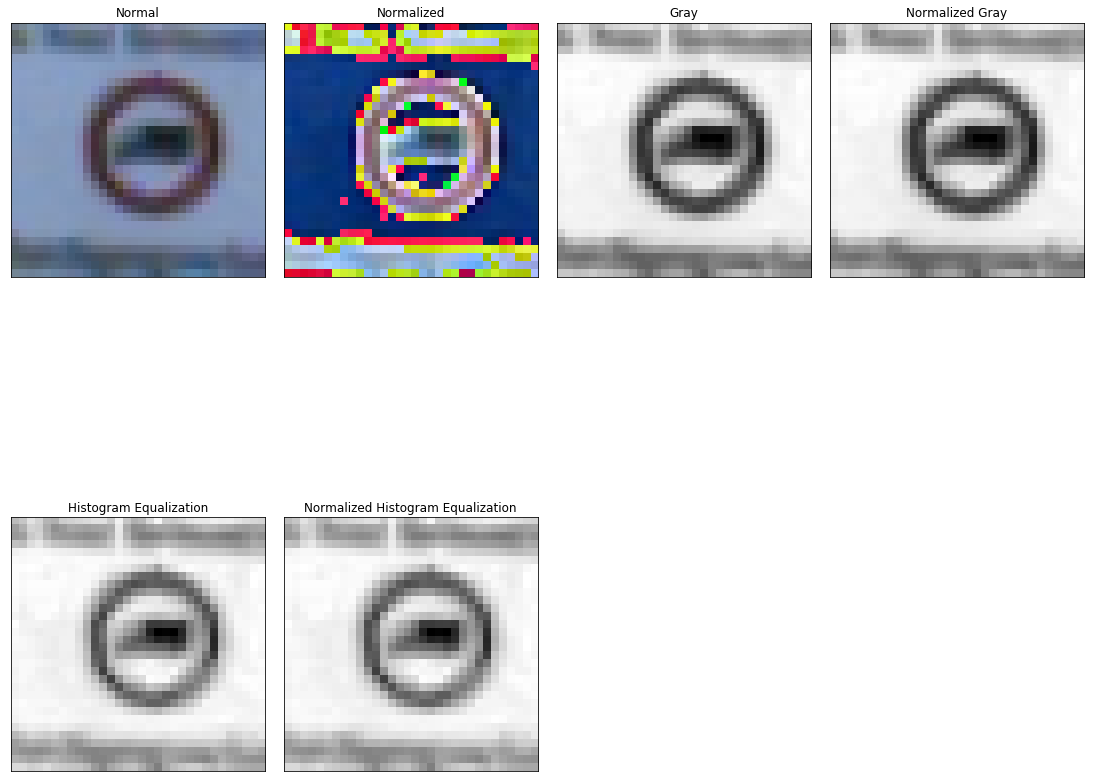

In [58]:
# Testing the Preprocess method

preprocess_test = [
                imageutils.preprocess_images([test_image], normalize = False)[0],
                imageutils.preprocess_images([test_image], normalize = True)[0],
                imageutils.preprocess_images([test_image], grayscale = True )[0], 
                imageutils.preprocess_images([test_image], grayscale = True, normalize = True)[0],
                imageutils.preprocess_images([test_image], grayscale = True, equalize = True)[0], 
                imageutils.preprocess_images([test_image], grayscale = True, equalize = True, normalize = True)[0]]
# for im in preprocess_test:
#     print(np.array(im).shape)

utils.show_images(preprocess_test, ['Normal',
                              'Normalized',
                              'Gray',
                              'Normalized Gray',
                              'Histogram Equalization', 
                              'Normalized Histogram Equalization'], horizontal=True)

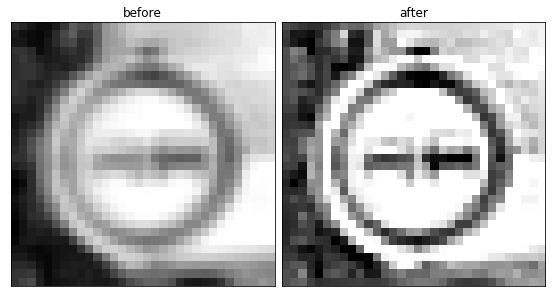

In [59]:
calhe_test_image = calhe_test_images[2]
test_image_copy = calhe_test_image.copy()

enhanced_image = imageutils.enhance_image(calhe_test_image, 8)

factor = 2
utils.show_images([calhe_test_images[2], enhanced_image], ['before', 'after'])

### Model Architecture

Here we create our model architecture that we'll then train and use to classify traffic signs. LeNet 5 was a good introduction to image classification, so we're going to build on it and enhance it to correctly classify the German traffic signs. 

#### Model structure

**LeNet5

First lets remember the LeNet 5 model architecture that we used in the previous lab it consisted of:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input Image         	| Normalized image 32x32x3    				| 
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 28x28x6 	|
| RELU					| Non linearity activation function			    |
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				|
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 10x10x16 	|
| RELU					| Non linearity activation function				|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 				    |
| Flattening            | Flattened the 5x5x16, output 400 feature array|
| Fully connected		| Takes 400, and outputs 120        			|
| Fully connected		| Takes 120, and outputs 84      				|
| Logits (Classifier)	| Takes	84, outputs 43							|
| Cross Entropy loss	| Softmax cross entropy 						|
| AdamOptimizer         | Optimize the model with a decaying learning rate|



**Here we can see both the LeNet architecture :**

![latest_LeNet.png](assets/latest_LeNet.png)
So we had 2 **convolutional** layers, 2 **maxpooling** layers, 2 **dense fully connected** layers, and finally 1 **output logits** layer, then we use the logits and get the **softmax cross entropy** and then train the model with the **Adamoptimizer**.



Our new MoNet0.1 model will build up on the LeNet 5 architecture by adding more optimizations, which are 
* One more `conv_maxpool` layer (I combined the convolutional and the maxpool in one method)
* Deeper filters to capture more information about the image
* Deeper fully connected layers
* Dropout added after each convolutional and fully connected layer to regularize our model and help from overfitting

![Latest_MoNet.png](assets/Latest_MoNet.png)

 
**Here is a more detailed description of the MoNet0.1 model:**

| Layer         		|     Description	        					                     | 
|:---------------------:|:-----------------------------------------------------------------:| 
| Input Image         	| Normalized CALHE 32x32x1 image   				                    | 
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 28x28x32 	                   |
| RELU					| Non linearity activation function			                          |
| Dropout               | Applies dropout of 0.75, 0.70, 0.65, 0.60                       |
| Max pooling	      	| 2x2 stride,  outputs 14x14x32 				              |
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 10x10x64 	                 |
| RELU					| Non linearity activation function				                      |
| Dropout               | Applies dropout of 0.75, 0.70, 0.65, 0.60                       |
| Max pooling	      	| 2x2 stride,  outputs 5x5x64 				                    |
| Convolution 5x5     	| 1x1 stride, SAME padding, outputs 5x5x128 	           |
| RELU					| Non linearity activation function				             |
| Dropout               | Applies dropout of 0.75, 0.70, 0.65, 0.60                  |
| Max pooling	      	| 2x2 stride,  outputs 2x2x6128 			                |
| Flattening            | Flattened the 2x2x128, output 512	feature array             |
| Fully connected		| Takes 512, and outputs 512        			                 |
| Dropout               | Applies dropout of 0.50                                    |
| Fully connected		| Takes 512, and outputs 256      				                   |
| Dropout               | Applies dropout of 0.50                               |
| Logits (Classifier)	| Takes	256, outputs 43							                    |
| Cross Entropy loss	| Softmax cross entropy 						               |
| AdamOptimizer         | Optimize the model with a decaying learning rate              |




#### LeNet5

Lets start from the roots and build the LeNet5 model to keep as a reference:


In [60]:
from tensorflow.contrib.layers import flatten

def LeNet5(input_tensor):
    # First convolution and maxpool  
    # Input = 32x32x1. Output = 14x14x6
    # Input to conv is 32x32x1, and output is 28x28x6.
    # Then input to pooling is 28x28x6 and output is 14x14x6.
    conv_max1 = conv_maxpool_layer(input_tensor, 6,
                                   conv_ksize = 5, conv_stride = 1,
                                   pool_ksize = 2, pool_stride = 2)
    # Second convolution and maxpool
    # Input = 14x14x6. Output = 5x5x16.
    # Input to conv is 14x14x6, and output is 10x10x16.
    # Then input to pooling is 10x10x16 and output is 5x5x16.
    conv_max2 = conv_maxpool_layer(conv_max1, 16,
                               conv_ksize = 5, conv_stride = 1,
                               pool_ksize = 2, pool_stride = 2)
    #Flatten the output in order to input it to the fully connected layers
    # 5x5x6 to 400
    flat_layer = flatten(conv_max2)
    # First Fully Connected layer 400 to 120
    dense1 = tf.layers.dense(flat_layer, units = 120, activation = tf.nn.relu)
    # Drop out
    # Second Fully Connected layer 120 to 84
    dense2 = tf.layers.dense(dense1, units = 84, activation = tf.nn.relu)
    # Last fully connected layer (Logits) 120 to 43. No activation for the last layer
    logits = tf.layers.dense(dense2, units = 43)
    
    return logits

### Construct MoNet0.1 
Here we'll be creating our own model, we'll go about this by creating multiple methods to help us have cleaner more modular code. Here are the methods that we'll be creating:
* `conv_layer()` method that will serve as our **convolutional layer** implementation, that will also include the *RELU* activation function.
* `conv_maxpool_layer()` method that combines both the **convolutional** and the **maxpooling** layers in one place it also applies **dropout** on the convolutional layer.
* `MoNet()` method which will implement our model by adding all the layers together and then outputs the **logits**

#### Convolution and maxpooling layers

Lets create our `convolutional` and `maxpooling` methods for our model. 
The first `conv_layer()` takes the following parameters:
* `input_tensor` the features from the previous layer or the input layer
* `output_shape` the filters that are in the output tensor
* `ksize` kernel or filter size mainly 5
* `stride` the number of strides to take
* `padding` the padding type 'SAME' or 'VALID'

The second is `conv_maxpool_layer()` which combines takes the following parameters:
* `input_tensor` the features from the previous layer or the input layer
* `output_shape` the filters that are in the output tensor for the convolutional layer
* `conv_ksize ` kernel or filter size for the convolutional layer mainly 5
* `conv_stride` the number of strides to take for the convolutional layer
* `pool_ksize` maxpool kernel value
* `conv_keep_prob` the keep probability for the dropout of the convolutional layer
* `conv_padding` the padding type 'SAME' or 'VALID' (VALID by default)
* `training = False` a boolean which indicates the state of the call either True for training or False(by default) for classification

In [61]:
def batch_normalization(input_tensor, training):
    return tf.contrib.layers.batch_norm(input_tensor, is_training = training)##tf.layers.batch_normalization(input_tensor, training = training)

def conv_layer(input_tensor, output_shape, ksize, stride, padding, name):
    '''
    :param input_tensor is a tensor 
    :param output_shape is what shape the convolution should produce
    :param ksize the kernel size
    :param stride strides
    : return: A tensor that represents convolution and Relu activation of input_tensor
    '''  
    mu = 0
    sigma = 0.1
    # Construct the weight and bias with the appropriate kernel size and output filter shape
    weight = tf.Variable(tf.truncated_normal(shape = (ksize,
                                                      ksize,
                                                      int(input_tensor.shape[3]),
                                                      output_shape),
                                             mean = mu,
                                             stddev = sigma))
    bias = tf.Variable(tf.zeros(output_shape))
    # Applying convolution of input_tensor
#     conv = tf.layers.conv2d(input_tensor,
#                             filters = output_shape,
#                             kernel_size = [ksize, ksize],
#                             padding = padding.lower(),
#                             activation = tf.nn.relu)
    conv = tf.nn.conv2d(input_tensor, weight, strides = [1, stride, stride, 1], padding = padding) + bias
    # Applying Relu activation
#     conv = batch_normalization(conv, training = training)# data_format='NCHW's
    return tf.nn.relu(conv, name=name)

def conv_maxpool_layer(input_tensor, output_shape,
                       conv_ksize, conv_stride,
                       pool_ksize,
                       conv_keep_prob,
                       name,
                       conv_padding = 'VALID', 
                       training = False):
    conv = conv_layer(input_tensor,
                      output_shape,
                      ksize = conv_ksize,
                      stride = conv_stride,
                      padding = conv_padding,
                      name=name)
    # Dropout with 0.75 keep prob
    conv = tf.layers.dropout(conv, conv_keep_prob, training = training)
    pool = tf.nn.max_pool(conv,
                          ksize = [1, pool_ksize, pool_ksize, 1],
                          strides= [1, pool_ksize, pool_ksize, 1],
                          padding = 'VALID')
#     pool = tf.layers.dropout(pool, conv_keep_prob, training = training)
    return pool

#### `MoNet()`

In the `MoNet()` method we add all of our layers and return the `logits`, so basically `MoNet()` is our model. We use the methods above as well as other methods from the `tf.nn` and `tf.layers` to construct our model, our method takes the following parameters:

* `input_tensor` our input batch of images as a tensor of `?x32x32x1 or 3`
* `conv_layer_filters` an array that contains each convolutional layer's output filter size
* `dense_layer_depth` an array that contains each fully connected layer's depth 
* `training` a boolean which indicates the state of the call either True for training or False for classification
* `batch_norm` a boolean that dictates whether or no to apply batch normalization
* `keep_prob = 0.5` a float for the fully connected layer's keep probability of the dropout
* `conv_keep_prob = 0.65` a float for the convolutional layer's keep probability of the dropout

In [62]:
from tensorflow.contrib.layers import flatten

def MoNet(input_tensor,
            conv_layer_filters,
            dense_layer_depth,
            training,
            batch_norm,
            keep_prob = 0.5,
            conv_keep_prob = 0.55):
    # First convolution and maxpool  
    # Input = 32x32x1. Output = 14x14x32
    # Input to conv is 32x32x1, and output is 28x28x32.
    # Then input to pooling is 28x28x32 and output is 14x14x32.
    conv_max1 = conv_maxpool_layer(input_tensor, conv_layer_filters[0],
                                   conv_ksize = 5, conv_stride = 1,
                                   pool_ksize = 2,
                                   training = training, conv_keep_prob = conv_keep_prob, name= 'conv1')

#     if batch_norm:
#         conv_max1 = batch_normalization(conv_max1, training = training)# data_format='NCHW'
    # Second convolution and maxpool
    # Input = 14x14x32. Output = 5x5x64.
    # Input to conv is 14x14x32, and output is 10x10x64.
    # Then input to pooling is 10x10x64 and output is 5x5x64.
    conv_max2 = conv_maxpool_layer(conv_max1,
                                   conv_layer_filters[1],
                                   conv_ksize = 5,
                                   conv_stride = 1,
                                   pool_ksize = 2,
                                   training = training,
                                   conv_keep_prob = conv_keep_prob, name= 'conv2')
#     if batch_norm:
#         conv_max2 = batch_normalization(conv_max2, training = training)
    # Third convolution and maxpool
    # Input = 5x5x64. Output = 2x2x128.
    # Input to conv is 5x5x64, and output is 5x5x128.
    # Then input to pooling is 5x5x128 and output is 2x2x128.
    conv_max3 = conv_maxpool_layer(conv_max2,
                                   conv_layer_filters[2],
                                   conv_ksize = 5,
                                   conv_stride = 1,
                                   conv_padding = 'SAME',
                                   pool_ksize = 1,
                                   training = training,
                                   conv_keep_prob = conv_keep_prob, name= 'conv3')
#     if batch_norm:
#         conv_max3 = batch_normalization(conv_max3, training = training)
    #Flatten the output in order to input it to the fully connected layers
    # 2x2x128 to 512
    flat_layer = flatten(conv_max3)
    # First Fully Connected layer 512 
    dense1 = tf.layers.dense(flat_layer, units = dense_layer_depth[0], activation = tf.nn.relu, name='dense1')
#     if batch_normalization:
#         dense1 = batch_normalization(dense1, training = training)
    # Dropout 1
    drop1 = tf.layers.dropout(inputs = dense1, rate = keep_prob, training = training)
    # Second Fully Connected layer 256 
    dense2 = tf.layers.dense(drop1, units = dense_layer_depth[1], activation = tf.nn.relu, name='dense2')
#     if batch_norm:
#         dense2 = batch_normalization(dense2, training = training)
    # Dropout 2
    drop2 = tf.layers.dropout(inputs = dense2,rate = keep_prob, training = training)

#     dense3 = tf.layers.dense(drop2, units = dense_layer_depth[2], activation = tf.nn.relu)
    
#     drop3 = tf.layers.dropout(inputs = dense3, rate = keep_prob, training = training)
    # Last fully connected layer (Logits) 43. No activation for the last layer
    logits = tf.layers.dense(drop2, units = 43)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Tensorflow Graph
Here we'll create construct our **tensorflow** graph that will be used for training, validation, and testing. We'll have to create **placeholders** for our variables that we'll feed to the graph, then we need a **one-hot encoding**  of our labels(classes), after that well have to create our operations for training, validation, and testing. 



#### Data Placeholders

Here we have `x` as a placeholder for the input images with `channels` as the number of channels, `y` a placeholder for the labels, and `training` is a *boolean* placeholder for the status of calling the classifier `MoNet`. We also have `channels` which is an *int* that specifies the number of channels of the images, 1 for *Grayscale* or *CALHE*, 3 for *RGB* and 4 for *RGBG*.

In [63]:
# 1 if grayscale, 3 if RGB (Color), and 4 for RGBG
channels = 1
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
training = tf.placeholder(tf.bool, ())
learning_rate = tf.placeholder(tf.float32, ())
# keep_probs = tf.placeholder(tf.float32, (2))

#### Onehot encode the labels

We'll one-hot encode our labels to use them in our cross entropy against our logits to getting the loss.

In [64]:
# Onehot encode our labels
one_hot = tf.one_hot(y, len(dataset.label_mapping))

#### Training Operations Pipeline
Let's create our training operations, these operations include:
* `logits` that executes our model for either training, evaluation, or inference
* `cross_entropy` gets the soft max cross entropy on our resulted logits against the one-hot encoded true labels
* `loss` calculates the mean squared loss on the cross entropy
* `optimizer` creates an instance of the `AdamOptimizer` object with the learning rate placeholder
* `train_network` optimizes our network by decreasing the loss using the momentum driven `AdamOptimizer`

In [65]:
logits = MoNet(x,
                 conv_layer_filters = [32, 64, 128],
                 dense_layer_depth = [512,256],
                 batch_norm= True,
                 training = training)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot, logits = logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)
# update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
# # with tf.control_dependencies(update_ops):
train_network = optimizer.minimize(loss)

**`train_network_with()`**

We'll also construct a `train_network_with()` that when called will use the training operations to train the model and output the training and validation accuracies, it will ultimately returns a list of accuracies that we'll use to plot and use to visualize our model performance over a given `epochs`.

This method first shuffles the `X_data` and `y_data` using the `sklearn.utils` method `shuffle()`, it then batches up the shuffled data with the given `batch_size`, trains the network using `train_network` operation and `feed_dict`, and finally it evaluates the accuracy of the `X_data` (training) and `X_val` (validation) and adds it to an array, then does this all again for the specified number of `epochs`. This repetition over multiple `epochs` will train the model's **weights** and **biases** and improve their values, which in turn will give us a better classification.

In [66]:
def train_network_with(X_data,
                       y_data,
                       X_val,
                       y_val,
                       epochs,
                       batch_size,
                       learn_rate):
    acc_data = []
    val_acc_data = []
    sess = tf.get_default_session()
    n_train = len(X_data)
    for i in range(epochs):
        batch_i = 1
        # Give the dataset a shuffle every epock
        X_train_t, y_train_t = shuffle(X_data, y_data, random_state = 0)
        for offset in range(0, n_train, batch_size):
            end = offset + batch_size
            x_batch, y_batch = X_train_t[offset : end], y_train_t[offset : end]
            sess.run(train_network, feed_dict = {x: x_batch,
                                                 y: y_batch,
                                                 training: True,
                                                 learning_rate: learn_rate})

        accuracy = evaluate(X_data, y_data, batch_size = batch_size)
        validation_accuracy = evaluate(X_val, y_val, batch_size = batch_size)
        
        acc_data.append(accuracy)
        val_acc_data.append(validation_accuracy)
        
        if  round(np.max(accuracy), 3) > round(np.max(validation_accuracy), 3) and round(np.max(validation_accuracy), 3) >= 0.995 and round(np.average(val_acc_data[-5:]), 3) >= 0.995:
            print("Got {:.3f} training accuracy and {:.3f} validation accuracy after {} epochs"
                  .format(accuracy, validation_accuracy, i+1))
            print("Yay! I'm better than a human :)")
            utils.beep()
            break
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f} ".format(accuracy))
        print("Validation Accuracy = {:.3f} \n".format(validation_accuracy))
    
    utils.beep()
    return [acc_data, val_acc_data]

#### Evaluation Operations Pipeline

Here we'll write our model evaluation operations which are:
* `correct_prediction` 
* `accuracy_operation` 
* `evaluate()` calculates the accuracy for the correct prediction or the logits against the true label

In [67]:
# Calculate accuracy 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset: offset + batch_size], y_data[offset: offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, training: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Preprocess Pipeline
Here is our preprocessing pipeline:
1. Enhance all images
2. Convert all images to **CALHE**
3. Augmenting our training images
3. Apply normalization with the new images mean and standard deviation to all sets

We'll be implementing different steps of the pipeline below an then we'll combine them to create our pipeline.

**For reference here is a graph of our data distribution before preprocessing:**

The most common Sign is: Speed limit (50km/h) with 2011 occurences
The least common Sign is: Go straight or left with 181 occurences
That makes the overall average occurences: 810


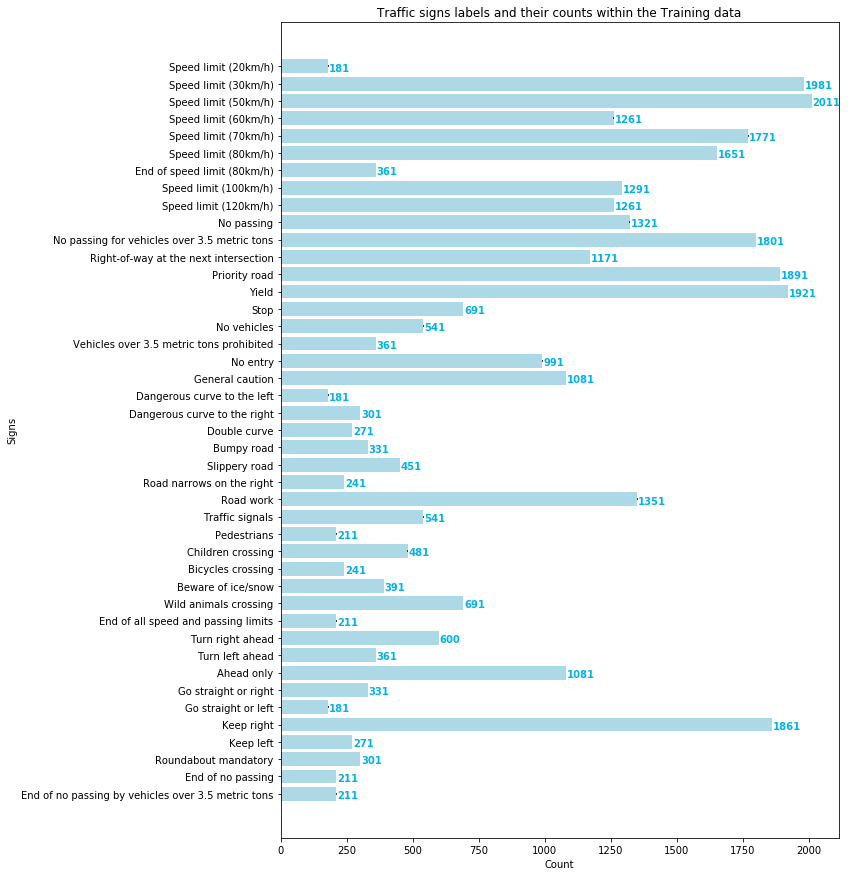

In [68]:
utils.show_label_counts_with_mapping(dataset.train.label_counter, dataset.label_mapping)

#### Augmentation:

In `augment()` we set `apply_relative_augmentation_on()` threshold to 1,600 which only applies augmentation to `X_data` and `y_data` classes with less than 1,600 images threshold, this **relative augmentation** of our dataset will give us a better more uniform representation of our data as we'll see below. The method also takes in the `mapping` to output the new data representations and classes frequencies by calling the `utils.show_label_counts_with_mapping()`.

In [69]:
def augment(X_data, y_data, mapping, show_dist=False):
    tic = time.clock()
    n_before_augmentation = len(X_data)
    X_augmented, y_augmented = imageutils.apply_relative_augmentation_on(X_data,
                                                                         y_data,
                                                                         threshold=1600)
    if show_dist:
        utils.show_label_counts_with_mapping(utils.get_data_count(X_augmented, y_augmented), mapping)

    toc = time.clock()
    print(toc - tic)
    utils.beep()
    print('Dataset size before augmentation {}'.format(n_before_augmentation))
    print('now we have {} images'.format(len(X_augmented)))
    print('and {} labels'.format(len(y_augmented)))
    return X_augmented, y_augmented

#### Preprocessing:

Here in the `preprocess()` method we construct our preprocessing pipeline on the input `dset` an instance of the `Dataset` object. We first **Enhance** and then apply **CALHE** to all of our training, validation, and test sets, then we **relatively augment** our training dataset to get a uniform representation of our data. At the end we apply normalization to all the datasets then we're ready for training and evaluation.

In [70]:
importlib.reload(imageutils)
def preprocess(title, dset, histogram, grayscale, rgbg, enhance, show_dist=False):
    # convert images to histograms and
    # Preprocessing the Validation data
    X_validation = imageutils.preprocess_images(dset.valid.X,
                                                equalize = histogram,
                                                grayscale=grayscale,
                                                normalize=False,
                                                rgbg=rgbg,
                                                enhance=enhance)
    
    #Preprocessing the Test data 
    X_test = imageutils.preprocess_images(dset.test.X,
                                          equalize = histogram,
                                          grayscale=grayscale,
                                          normalize=False,
                                          rgbg=rgbg,
                                          enhance=enhance)
    
    # Preprocessing the Training data
    X_training = imageutils.preprocess_images(dset.train.X,              
                                              normalize = False,
                                              grayscale=grayscale,
                                              equalize=histogram,
                                              rgbg=rgbg,
                                              enhance=enhance)#X_train_augmented
    
    
    
    
#     X_validation = list(map(imageutils.sharpen_image, X_validation))
#     X_training = list(map(imageutils.sharpen_image, X_training))
#     X_test = list(map(imageutils.sharpen_image, X_test))
    
    
    # Apply image relative augmentation
    X_training, y_training = augment(X_training, dset.train.y, dset.label_mapping, show_dist=show_dist)
    
    global_mean, _ = imageutils.get_images_mean(np.array(X_training))
    global_std = imageutils.get_images_std(np.array(X_training))

    # Normalizing all the datasets
    X_validation = imageutils.normalize_images(X_validation, global_mean, global_std)#, global_mean, global_std)
    X_test = imageutils.normalize_images(X_test, global_mean, global_std)#, global_mean, global_std)
    X_training = imageutils.normalize_images(X_training, global_mean, global_std)
    return X_training, y_training, X_validation, X_test



# show_images([X_train_test[-1], X_train_test[-2]], [labels_mapping[str(y_train_augmented[-1])], labels_mapping[str(y_train_augmented[-1])]])

#### Applying our preprocessing pipeline:
Finally we apply our preprocessing pipeline by applying `preprocess()` on our dataset, we get the `X_train` and `y_train_value` for the processed and augmented training data, and `X_valid_value` and `X_test_value` for the preprocessed validation and testing data.

The most common Sign is: Speed limit (50km/h) with 2011 occurences
The least common Sign is: Turn right ahead with 1600 occurences
That makes the overall average occurences: 1649


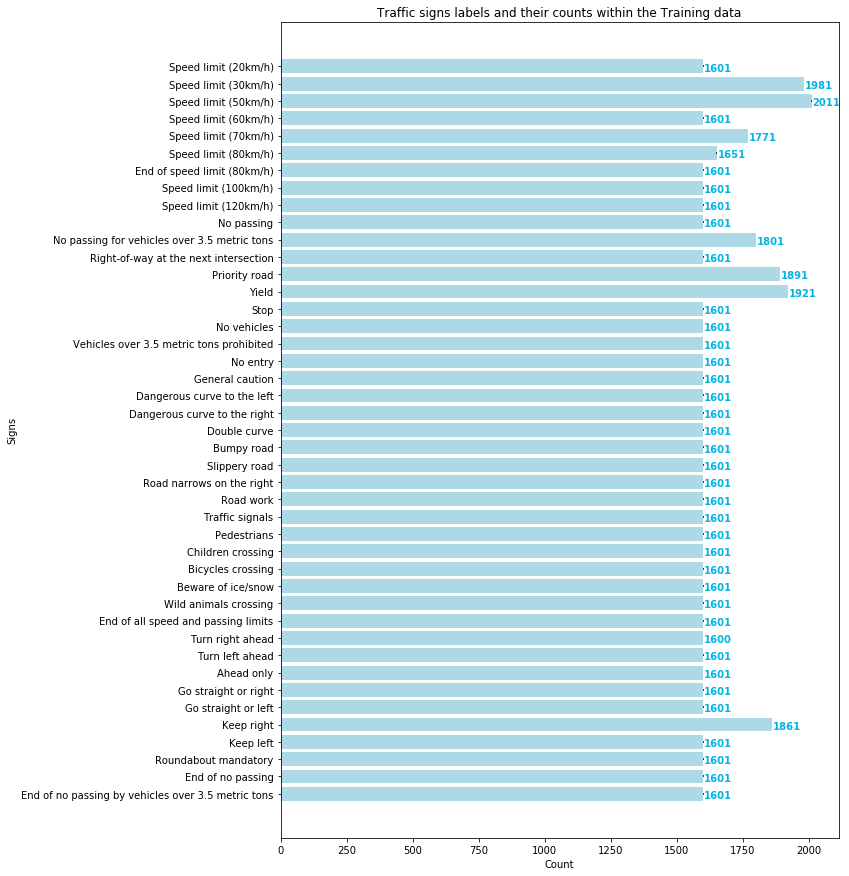

5.8938807541723355
Dataset size before augmentation 34799
now we have 70879 images
and 70879 labels


In [71]:
l = 'Normalized Histogram augmented'
rgbg = False
histogram = True
grayscale = False
enhance = True
X_train_value, y_train_value, X_valid_value, X_test_value = preprocess(l,
                                                        dataset,
                                                        histogram=histogram,
                                                        grayscale=grayscale,
                                                        enhance=enhance,
                                                        rgbg=rgbg, show_dist=True)

**Here we show some examples of the training, validation, and test sets before and after preprocessing:**

Training images after preprocessing:


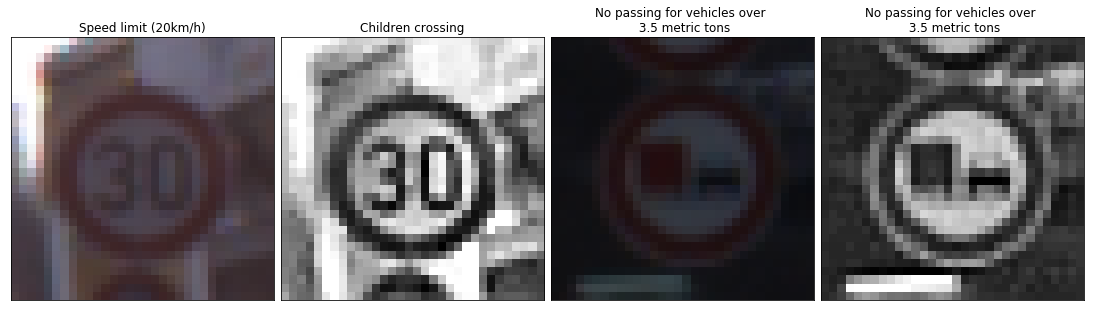

All training images now are of shape (32, 32, 1) 

Validation images after preprocessing:


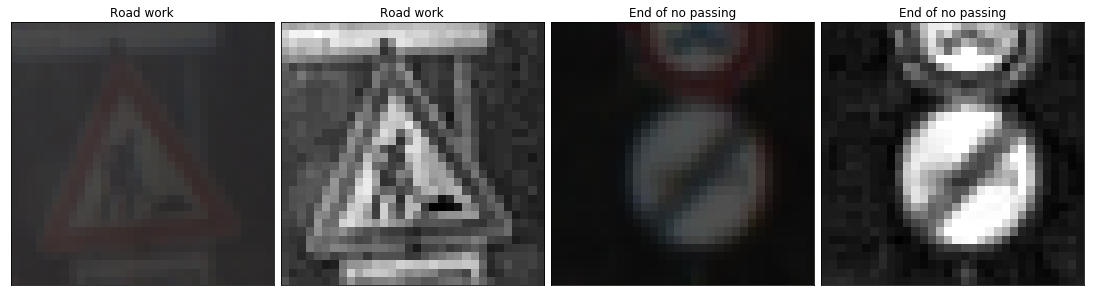

All validation images now are of shape (32, 32, 1) 

Testing images after preprocessing:


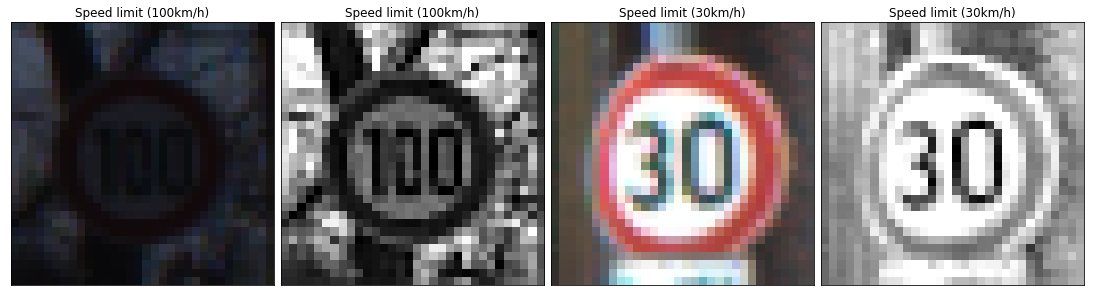

All testing images now are of shape (32, 32, 1) 



In [72]:
print('Training images after preprocessing:')    
utils.show_images([dataset.train.X[4], X_train_value[4], 
                   dataset.train.X[1], X_train_value[1]],
            [dataset.label_mapping[str(y_train_value[-2])],
             dataset.label_mapping[str(dataset.train.y[19])],
             dataset.label_mapping[str(y_train_value[1])],
             dataset.label_mapping[str(dataset.train.y[1])]])
# plt.imshow(X_train_test[-4].squeeze(), cmap = 'gray')
print('All training images now are of shape {} \n'.format(X_train_value[-4].shape))
print('Validation images after preprocessing:')
utils.show_images([dataset.valid.X[-2],X_valid_value[-2], 
                   dataset.valid.X[1], X_valid_value[1]], 
                  [dataset.label_mapping[str(dataset.valid.y[-2])],
                   dataset.label_mapping[str(dataset.valid.y[-2])],
                   dataset.label_mapping[str(dataset.valid.y[1])],
                   dataset.label_mapping[str(dataset.valid.y[1])]])
print('All validation images now are of shape {} \n'.format(X_valid_value[-4].shape))
print('Testing images after preprocessing:')
utils.show_images([dataset.test.X[-2],X_test_value[-2], 
                   dataset.test.X[1], X_test_value[1]], 
                  [dataset.label_mapping[str(dataset.test.y[-2])],
                   dataset.label_mapping[str(dataset.test.y[-2])],
                   dataset.label_mapping[str(dataset.test.y[1])],
                   dataset.label_mapping[str(dataset.test.y[1])]])
print('All testing images now are of shape {} \n'.format(X_test_value[-4].shape))

So now as you can see above we almost doubled our dataset and in the process we have a better more uniform distribution that will eliminate the model from being biased towards higher count classes.

### Train the Model

In [75]:
accuracy_dict  = {'Color': [],
                       'Normalized Histogram': [],
                       'Normalized Grayscale': [],
                       'Normalized Histogram rgbg': []}

In [76]:
# Hyperparameters
EPOCHS = 2000
BATCH_SIZE = 1024
learn_rate = 0.0001
current_network = './MoNet0.1.3.1'
saver = tf.train.Saver()

In [ ]:
tic = time.clock()

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    print(l)
    print("training...\n")
    accuracy_dict[l] = train_network_with(X_train_value,
                                          y_train_value,
                                          X_valid_value,
                                          dataset.valid.y,
                                          EPOCHS,
                                          BATCH_SIZE,
                                          learn_rate)

    saver.save(sess, current_network)
    print('Model saved to '+ current_network.replace('./', ''))
    toc = time.clock()
    print()
    print(toc - tic)

#### Plot accuracy

Normalized Histogram augmented Max Training accuracy: 0.9999, Max Validation accuracy: 0.9943


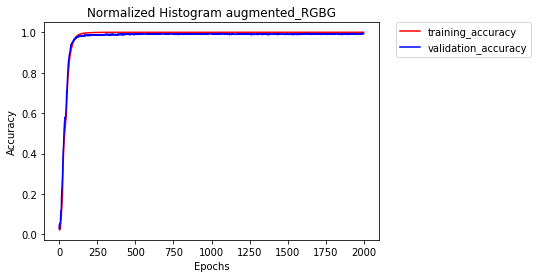

In [78]:
acc_data, val_acc_data = accuracy_dict[l]
print(l + ' Max Training accuracy: {}, Max Validation accuracy: {}'.format(round(np.max(acc_data), 4),
                                                                           round(np.max(val_acc_data), 4)))
utils.plot_accuracy(l + '_RGBG', acc_data, val_acc_data, directory = "./accuracies/finaltests")

#### Confusion Matrix

In [79]:
# Calculate accuracy 
prediction_op = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
confusion_matrix_op = tf.confusion_matrix(dataset.valid.y,
                                       prediction_op,
                                       len(dataset.label_mapping))
feed_dict={x: X_valid_value, y: dataset.valid.y, training: False}
with tf.Session() as sess:
    saver.restore(sess, current_network)
    print(sess.run(correct_prediction, feed_dict=feed_dict))
#     confusion_matrix = sess.run(confusion_matrix_op, feed_dict=feed_dict)
#     print(confusion_matrix)

INFO:tensorflow:Restoring parameters from ./MoNet0.1.3.1
[ True  True  True ...  True  True  True]


In [ ]:
a = ' Augmentation drop 500 all but first FC 0.5, 0.70'
np.argmax(val_acc_data)

### Evaluate the Finalized model
Here we'll evaluate our trained `MoNet` models on the:
* Training
* Validation
* Test
to see how well it will do on each. We'll be showing a couple of different variations of the model and their affect on the accuracies. 

All the models were trained for 2000 epochs with a batch size of 1024, and a 0.0001 learning rate. 

In [80]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.3.1')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.3.1
Training Accuracy = 99.986 %
Validation Accuracy = 99.274%
Test Accuracy = 97.997%


#### MoNet 0.1.1

This version of the network has the MoNet archtecture with:
* `0.60` keep probability for the convolutional layers and `0.50` for the fully connected layers.
* Image enhancements after histogram equalization.

In [686]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.1')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.1
Training Accuracy = 99.468 %
Validation Accuracy = 98.798%
Test Accuracy = 95.812%


#### MoNet 0.1.2

This version of the network is the same as the `MoNet0.1.1` before it, but with a `0.55` keep probability for the convolutional layers, and a no image enhancements. So a decrease of **5%** to better generalize given the high epoch count.

We lowered the convolutional layer's dropout to `0.55` which is the lowest we'll be doing in this project, this is to prevent the network from over-fitting our training data over many epochs. The importance of **dropout** is that it helps generalize the model over the validation, test, or any example by randomly omitting 50% (the keep probability 100 - keep probability) of the layer's features by setting their weights to zeros, this helps the network to be independent of certain features and give notice to all features equally; for example, if we have a feature like rounded corners and we assign high weight to it all the time then it over shadows the other features because we're just increasing its weight without giving chance for the other features to get trained as well, but by adding a drop out we know that we give every feature a change in training which will in turn abstract some of the features that will help generalize to future edged examples per se.

In [687]:
l = 'Normalized Histogram augmented'
rgbg = False
histogram = True
grayscale = False
enhance = False
X_train_value, y_train_value, X_valid_value, X_test_value = preprocess(l,
                                                        dataset,
                                                        histogram=histogram,
                                                        grayscale=grayscale,
                                                        enhance=enhance,
                                                        rgbg=rgbg)

5.485260634595761
Dataset size before augmentation 34799
now we have 70879 images
and 70879 labels


In [688]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.2')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.2
Training Accuracy = 99.907 %
Validation Accuracy = 99.410%
Test Accuracy = 97.530%


#### MoNet 0.1.3

The exact same as `MoNet 0.1.2`, but we added back image enhancements.

In [689]:
l = 'Normalized Histogram augmented'
rgbg = False
histogram = True
grayscale = False
enhance = True
X_train_value, y_train_value, X_valid_value, X_test_value = preprocess(l,
                                                        dataset,
                                                        histogram=histogram,
                                                        grayscale=grayscale,
                                                        enhance=enhance,
                                                        rgbg=rgbg)

5.410244970291387
Dataset size before augmentation 34799
now we have 70879 images
and 70879 labels


In [690]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.3')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.3
Training Accuracy = 99.876 %
Validation Accuracy = 98.753%
Test Accuracy = 98.021%


#### MoNet 0.1.4

Here we maintained the same *dropout* values for each the `convolutional` and the `fully connected` layers, but apply image enhancements before converting images into histogram equalized *CALHE* images. We also added a **filter** to end the training if we get a validation accuracy above `99.5%`. 

In [691]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.4')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.4
Training Accuracy = 99.914 %
Validation Accuracy = 99.410%
Test Accuracy = 97.981%


#### MoNet 0.1.5

Here we just reran the `MoNet 0.1.4` and adjusted the filter to make sure that the `99.5%` isn't resulted by a good guess, but consistent along at least 4 consecutive epochs.



In [692]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.5')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.5
Training Accuracy = 99.932 %
Validation Accuracy = 99.478%
Test Accuracy = 98.155%


#### MoNet 0.1.6

Here we just change the enhancement sharpness `factor` to **5** instead of the **3** that we've been using in previous tests.

In [693]:
with tf.Session() as sess:
    saver.restore(sess, './MoNet0.1.6')

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.3f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.3f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.6
Training Accuracy = 99.937 %
Validation Accuracy = 99.252%
Test Accuracy = 98.108%


#### MoNet 0.1.7

Here we'll be more ambtious and tryout our settings on `RGBG` image which is the combination between both an `RGB` image and a `CALHE` gray image, the resulting image will be of size `32x32x4`. We'll try this out because maybe this will give us extra information from the colored `RGB` image and in turn give us more accurate results.

In [57]:
# with tf.Session() as sess:
#     saver.restore(sess, './MoNet0.1.7')

#     training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
#     validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
#     test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
#     print("Training Accuracy = {:.3f}".format(training_accuracy))
#     print("Validation Accuracy = {:.3f}".format(validation_accuracy))
#     print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./MoNet0.1.7
Training Accuracy = 0.994
Validation Accuracy = 0.978
Test Accuracy = 0.977


#### Chosen Version
Finally the chosen version of the trained model is the `MoNet0.1.3`, I initially chose `0.1.5` cause it has the highest accuracies of almost `100%` on training, `99.5%` on validation, and finally testing accuracy of `98.2%` **the highest accuracy yet**; however, after testing the model on the images below I decided to change it to `0.1.4` which gave better results, but then after further investigation I ended up choosing the `0.1.3` version which has close results to the other later versions and proved to be more robust delivering the highest accuracy for the test images as we'll see below.

In [96]:
BATCH_SIZE = 1024
chosen_version = 'MoNet0.1.3'
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, chosen_version)

    training_accuracy = evaluate(X_train_value, y_train_value, BATCH_SIZE)
    validation_accuracy = evaluate(X_valid_value, dataset.valid.y, BATCH_SIZE)
    test_accuracy = evaluate(X_test_value,dataset.test.y, BATCH_SIZE)
    print("Training Accuracy = {:.2f} %".format(training_accuracy * 100))
    print("Validation Accuracy = {:.2f}%".format(validation_accuracy * 100))
    print("Test Accuracy = {:.2f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from MoNet0.1.3
Training Accuracy = 99.90 %
Validation Accuracy = 99.05%
Test Accuracy = 98.09%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images
We added all project test images in `assets/test_images/project_test_images/` directory, we choose `6` images because we need to see how the network performs on different traffic signs of different shapes and conditions.

Here is why we ended up selecting these images:
1. **Priority  road** because its under *dim lighting* and the sign itself doesn't follow the majority of either circular or triangular signs, so I'm curious of how it'll perform.
2. **Keep right** for the *warm lighting* condition that its under, and to test one of the *blue signs*. 
3. **Traffic signals** honestly, I can't make it out without squinting in the `32x32x3` format.
4. **Stop** for its *noisy and distorted quality*, not to mention that its *skewed*
5. **Speed limit (20km/h)** due to the fact that it had one of the *lowest frequncies* in the original dataset, so this is a good way to affirm the belief that our added augmentations worked. Also the image is *skewed* and I've added a *graffiti* of my own here.
6. **No entry** because I took it under *low lighting conditions* in a video with *motion blur*, so its a good real world example, plus its a  *UAE traffic sign* which looks very close to its German counter part though as we'll see the line in the center is a bit shorter.

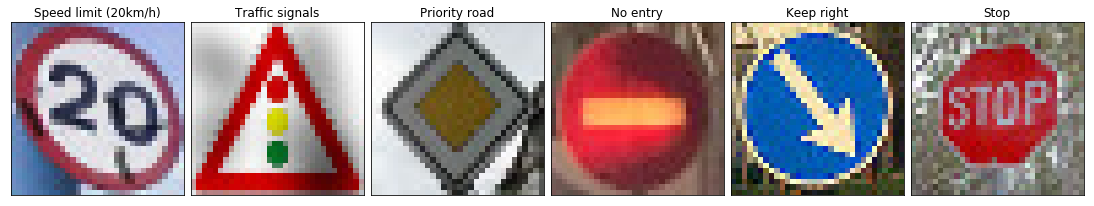

In [97]:
import matplotlib.image as mpimg
import os
importlib.reload(utils)

def load_test_images(directory):
    test_images = {image_name.split('.')[0]: mpimg.imread(directory + image_name) for image_name in os.listdir(directory)}
    test_images_labels = [dataset.label_mapping[label] for label in list(test_images.keys())]
    # Showing the loaded images
    test_images_list = list(test_images.values())
    utils.show_images(test_images_list,
                      test_images_labels,
                      horizontal=False,
                      save=True, 
                      image_name='test_images', cols=6) 
    return test_images_list, list(test_images.keys()), test_images_labels

# Loading the images from the project_test_images directory
directory = "assets/test_images/project_test_images/"
test_images, test_images_labels, test_images_names = load_test_images(directory)

Above are the chosen `6` images of different shapes, quality, and lighting.

### Predict the Sign Type for Each Image

#### Preprocessing the test images

Here we apply the same preprocessing pipeline we applied on the training, validation, and test sets. 

(6, 32, 32, 1)
(32, 32, 1)


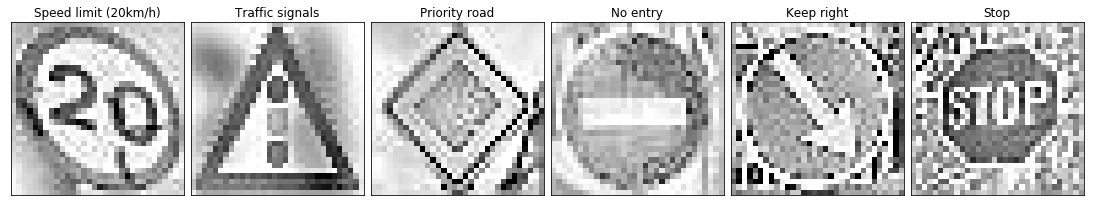

In [98]:
global_mean, global_mean_image = imageutils.get_images_mean(np.array(X_train_value))
global_std = imageutils.get_images_std(np.array(X_train_value))


# Preprocessing the images
def preprocess_test_images(test_images, test_images_names, global_mean, global_std):
    preprocessed_test_images = imageutils.preprocess_images(np.array(test_images),
                                                            equalize=True,
                                                            normalize=False,
                                                            enhance=True)
    print(preprocessed_test_images.shape)
    # Normalizing the images with the Training set global mean and standard deviation
    normalized_test_images = imageutils.normalize_images(preprocessed_test_images,
                                                         global_mean, global_std)
    print(normalized_test_images[0].shape)
    utils.show_images(normalized_test_images,
                      test_images_names,
                      horizontal=True,
                      save=True,
                      image_name='preprocessed_test_images', cols=6)
    return normalized_test_images

preprocessed_test_images = preprocess_test_images(test_images,
                                                  test_images_names,
                                                  global_mean,
                                                  global_std)

#### Inference on the Images
Here we run the images through our chosen model and get the prediction for each, if the image got the right prediction it's name is going to be displayed in <span style="color:green">*green*</span> otherwise its going to be in <span style="color:red">*red*</span>.

INFO:tensorflow:Restoring parameters from MoNet0.1.3
True:     Speed limit (20km/h)  as Speed limit (20km/h)
True:     Traffic signals  as Traffic signals
True:     Priority road  as Priority road
True:     No entry  as No entry
True:     Keep right  as Keep right
True:     Stop  as Stop


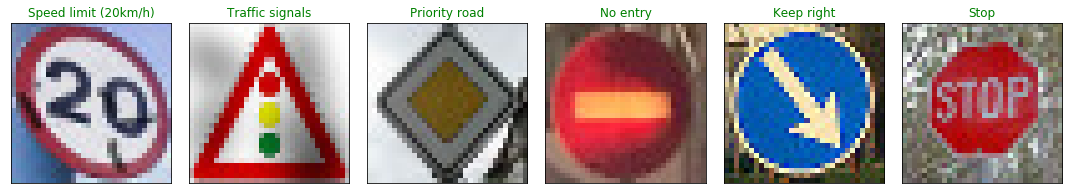

In [99]:
importlib.reload(utils)
def get_test_images_predictions(preprocessed_test_images,
                                test_images,
                                test_images_labels,
                                test_images_names,
                                sess):
    predictions = sess.run(logits, feed_dict={x: preprocessed_test_images,
                                                     y: test_images_labels,
                                                     training: False})
    
    prediction_values = sess.run(tf.argmax(predictions, 1))
    
    image_predictions = sess.run(correct_prediction, feed_dict={x: preprocessed_test_images,
                                                     y: test_images_labels,
                                                     training: False})
    
    prediction_values_names = [dataset.label_mapping[str(label)] for label in prediction_values]
                           
    for name, p, pred  in zip(test_images_names, image_predictions, prediction_values_names):
        print('{}:     {}  as {}'.format(p,
                                         name,
                                         pred))
                           
    utils.show_images_prediction(np.array(test_images), 
                                 image_predictions,
                                 prediction_values_names,
                                 images_titles=test_images_names, cols=6)
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    get_test_images_predictions(preprocessed_test_images, 
                                test_images,
                                test_images_labels,
                                test_images_names,
                                sess)

As we see all of the test images were identified correctly we can even see how well did our classifier really does by seeing the percentage of the classification which we'll do later in the notebook.

### Analyze Performance

In [100]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    test_images_accuracy = evaluate(preprocessed_test_images,
                                    test_images_labels,
                                    len(preprocessed_test_images))
    print("We got a {:.1f}% Test Accuracy on the {} test images ".format(test_images_accuracy * 100, len(test_images_labels)))

INFO:tensorflow:Restoring parameters from MoNet0.1.3
We got a 100.0% Test Accuracy on the 6 test images 


So we got a **100%** accuracy on these *6* test images a **2%** increase over our dataset test accuracy of **98%**, this might be because we're testing on a very small number of images **6** images to be exact versus the **12,630** test set images, so we're not encountering any of the **2%** (252 images) misclassified images we had for the test set. 

This sparks my curiosity and made me test the model's prediction on more test images either taken by my phone or found online. The images got perfect results for most but we had some special cases that'll be shown below.

### Especial Cases
Here is one intriguing case, where the chosen `MoNet0.1.4` classifies **No passing for vehicles over 3.5 tons** correctly while misclassifying the **End of no passing for vehicles over 3.5 tons** which is another version of the same sign. Where in contrast the our second best model variation `MoNet0.1.5` does the opposite as we'll see below.

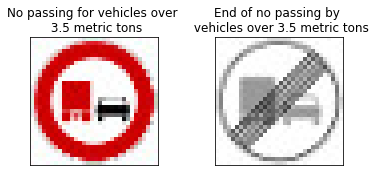

(2, 32, 32, 1)
(32, 32, 1)


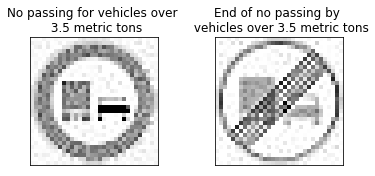

In [101]:
# Loading the images from the especial_cases directory
directory = "assets/test_images/especial_cases/"
esp_test_images, esp_test_images_labels, esp_test_images_names = load_test_images(directory)
# Preprocessing the especial test images
preprocessed_esp_test_images = preprocess_test_images(esp_test_images,
                                                  esp_test_images_names,
                                                  global_mean,
                                                  global_std)

Now we're going to test these 2 images on 2 of our model variations the chosen `MoNet0.1.4` and the `MoNet0.1.5`

#### `MoNet0.1.4` Test

INFO:tensorflow:Restoring parameters from MoNet0.1.4
True:     No passing for vehicles over 3.5 metric tons  as No passing for vehicles over 3.5 metric tons
False:     End of no passing by vehicles over 3.5 metric tons  as End of speed limit (80km/h)


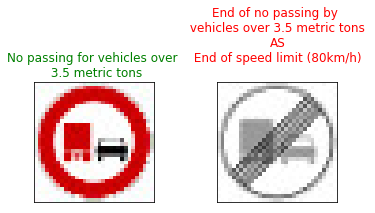

In [102]:
with tf.Session() as sess:
    saver.restore(sess, 'MoNet0.1.4')
    get_test_images_predictions(preprocessed_esp_test_images, 
                                esp_test_images,
                                esp_test_images_labels,
                                esp_test_images_names,
                                sess)

As we see here our `0.1.4` version misclassified **End of passing by vehicles over 3.5 metric tons** as **End of speed limit (80km/h)** which in all fairness bears a lot of similarity to, for both of them are black and white and have lines going diagonally through them.

#### `MoNet0.1.5` Test

INFO:tensorflow:Restoring parameters from MoNet0.1.5
False:     No passing for vehicles over 3.5 metric tons  as End of no passing by vehicles over 3.5 metric tons
True:     End of no passing by vehicles over 3.5 metric tons  as End of no passing by vehicles over 3.5 metric tons


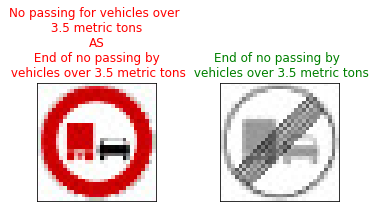

In [103]:
with tf.Session() as sess:
    saver.restore(sess, 'MoNet0.1.5')
    get_test_images_predictions(preprocessed_esp_test_images, 
                                esp_test_images,
                                esp_test_images_labels,
                                esp_test_images_names,
                                sess)

Version `0.1.5`  does the opposite of `0.1.4` and it falsely classifies **No passing by vehicles over 3.5 metric tons** as **End of no passing by vehicles over 3.5 metric tons**, this  behaviour is rather peculiar because its virtually the same model with the only difference being that `0.1.5` have been trained for a couple of hundred epochs more. This suggests that each model overfit one of the signs and ignored the other, its still a very strange case that needs further investigation.

#### `MoNet0.1.3` Test

INFO:tensorflow:Restoring parameters from MoNet0.1.3
True:     No passing for vehicles over 3.5 metric tons  as No passing for vehicles over 3.5 metric tons
True:     End of no passing by vehicles over 3.5 metric tons  as End of no passing by vehicles over 3.5 metric tons


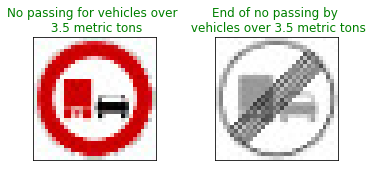

In [104]:
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    get_test_images_predictions(preprocessed_esp_test_images, 
                                esp_test_images,
                                esp_test_images_labels,
                                esp_test_images_names,
                                sess)

I ended up choosing the `MoNet0.1.3` due to its robust classification of all test signs, in addition to its handling of this especial case that baffled the other 2 variations.

### UAE Traffic Signs Test

Here we needed to test what results our model will give on **UAE(United Arab Emirates)** traffic signs that we took, some of these signs have Arabic writing like the **Stop** sign, and others are not in the original **German traffic signs** dataset like the second image were we labeled as **Right-of-way at the next intersection** because its the closest counterpart in the dataset. We also have the **Traffic signal** that looks close to the **German sign** though the traffic lights are bordered by a black rectangular shape rather than white.

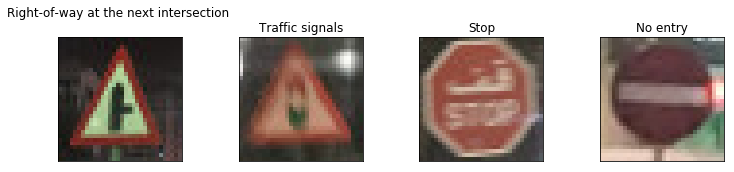

(4, 32, 32, 1)
(32, 32, 1)


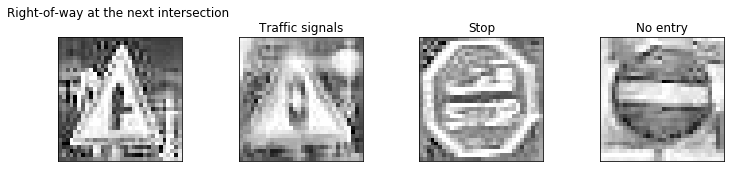

In [105]:
directory = "assets/test_images/uae_signs/"
uae_test_images, uae_test_images_labels, uae_test_images_names = load_test_images(directory)
# Preprocessing the especial test images
preprocessed_uae_test_images = preprocess_test_images(uae_test_images,
                                                  uae_test_images_names,
                                                  global_mean,
                                                  global_std)

INFO:tensorflow:Restoring parameters from MoNet0.1.3
True:     Right-of-way at the next intersection  as Right-of-way at the next intersection
False:     Traffic signals  as Go straight or right
False:     Stop  as No entry
True:     No entry  as No entry


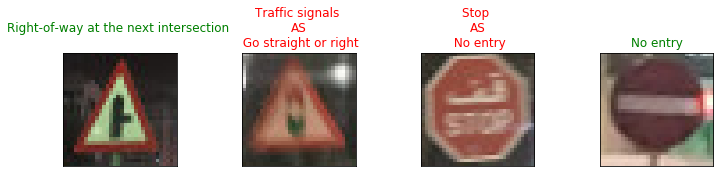

In [106]:
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    get_test_images_predictions(preprocessed_uae_test_images, 
                                uae_test_images,
                                uae_test_images_labels,
                                uae_test_images_names,
                                sess)

As we can see we go a **50%** accuracy on these **4** images, the images that closely resembled the **German** signs were correctly classified; however, the **Stop** sign which has the same edges as the original dataset was misclassified, maybe thats because the classifier pays more consideration to the content inside the sign edges.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from MoNet0.1.3


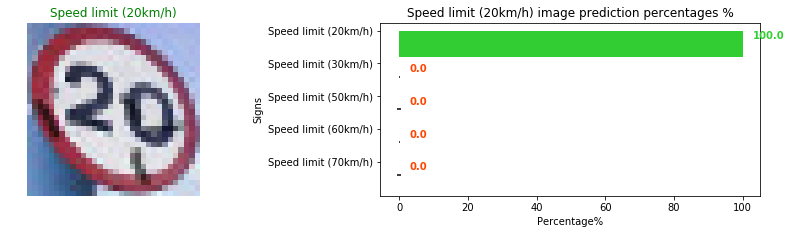

Speed limit (20km/h) with 100.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%
Speed limit (70km/h) with 0.0%


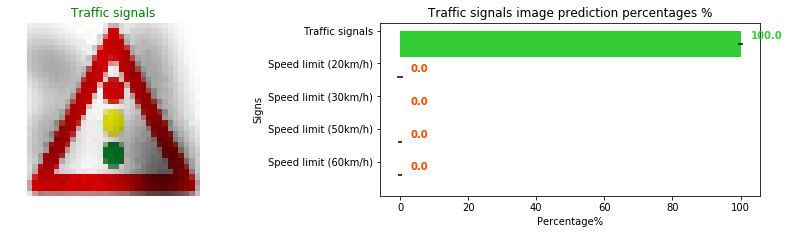

Traffic signals with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


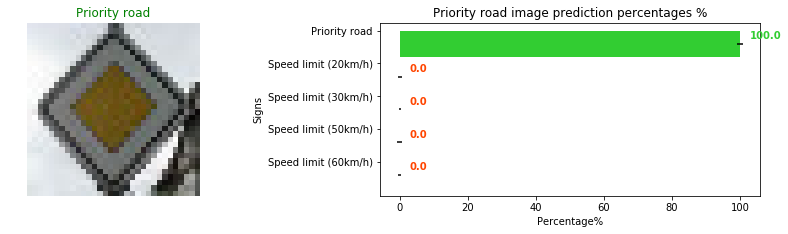

Priority road with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


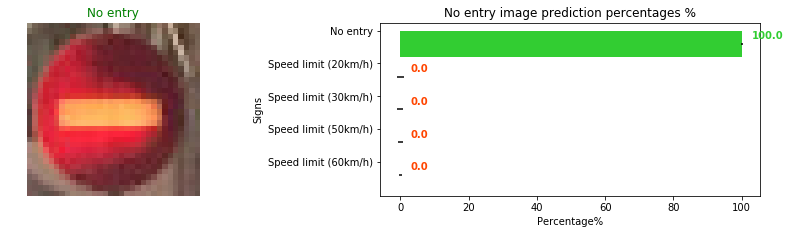

No entry with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


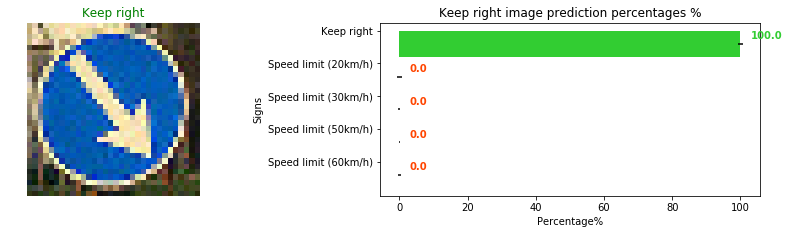

Keep right with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


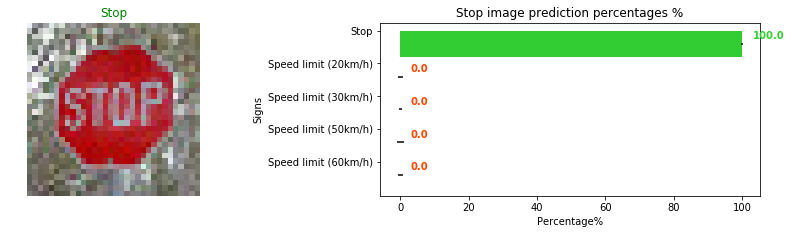

Stop with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


In [107]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
importlib.reload(utils)
def show_top_k_predictions(k,
                           preprocessed_images,
                           test_images,
                           test_images_labels,
                           test_images_names,
                           sess):
    predictions = sess.run(logits, feed_dict={x: preprocessed_images,
                                                     y: test_images_labels,
                                                     training: False})
    
    softmax_predictions = sess.run(tf.nn.softmax(predictions))
    
    top_5_predictions = sess.run(tf.nn.top_k(softmax_predictions, k=k))
    
    image_predictions = sess.run(correct_prediction, feed_dict={x: preprocessed_images,
                                                     y: test_images_labels,
                                                     training: False})


    # Print the top 5 predictions for each image
    for i, image in enumerate(np.array(test_images)):
        top_k_labels = [dataset.label_mapping[str(t)] for t in top_5_predictions[1][i]]
        top_k_values =  [v * 100.000 for v in top_5_predictions[0][i]]
        title = test_images_names[i]
        utils.show_image_topk(image, top_k_labels, top_k_values, title, image_predictions[i])
        for j in range(len(top_5_predictions[0][i])):
            title = dataset.label_mapping[str(top_5_predictions[1][i][j])]
            percentage = top_5_predictions[0][i][j]
            print('{} with {}%'.format(title, percentage*100.000))
    
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    k = 5
    show_top_k_predictions(k,
                           preprocessed_test_images,
                           test_images,
                           test_images_labels,
                           test_images_names,
                           sess)
        

The Softmax probabilites 

#### Especial Cases Top 5 Predictions

##### `MoNet0.1.4`

INFO:tensorflow:Restoring parameters from MoNet0.1.4


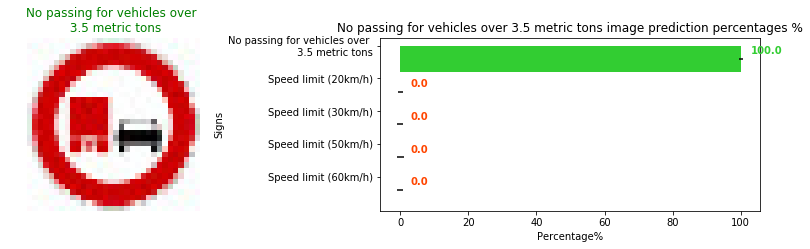

No passing for vehicles over 3.5 metric tons with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


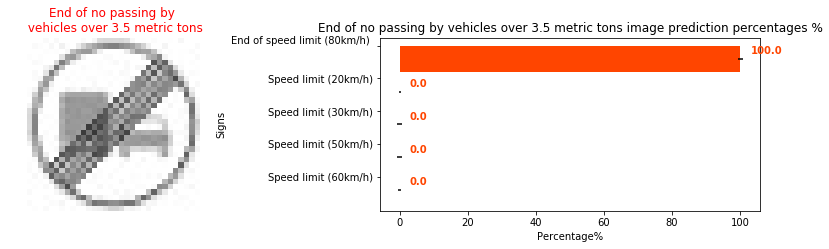

End of speed limit (80km/h) with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


In [108]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, 'MoNet0.1.4')
    k = 5
    show_top_k_predictions(k,
                           preprocessed_esp_test_images,
                           esp_test_images,
                           esp_test_images_labels,
                           esp_test_images_names,
                           sess)
        

##### `MoNet0.1.5`

INFO:tensorflow:Restoring parameters from MoNet0.1.5


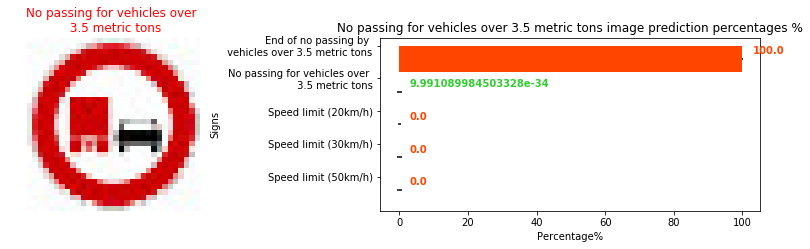

End of no passing by vehicles over 3.5 metric tons with 100.0%
No passing for vehicles over 3.5 metric tons with 9.991089984503328e-34%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%


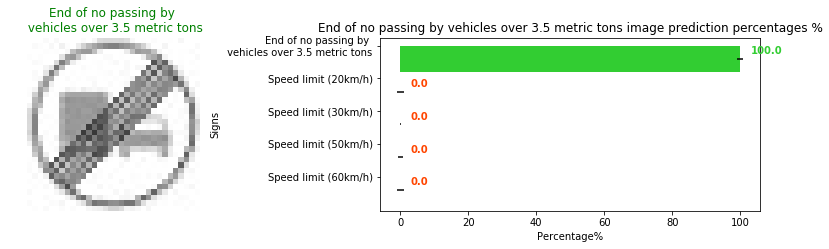

End of no passing by vehicles over 3.5 metric tons with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


In [109]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, 'MoNet0.1.5')
    k = 5
    show_top_k_predictions(k,
                           preprocessed_esp_test_images,
                           esp_test_images,
                           esp_test_images_labels,
                           esp_test_images_names,
                           sess)
        

##### `MoNet0.1.3`

INFO:tensorflow:Restoring parameters from MoNet0.1.3


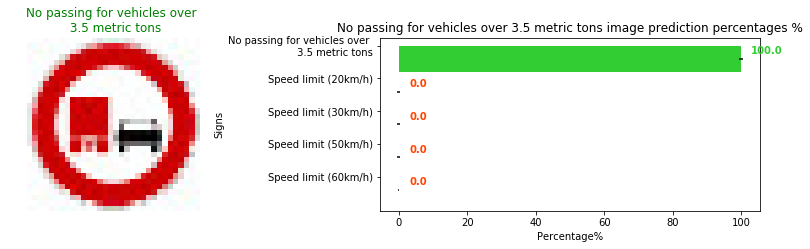

No passing for vehicles over 3.5 metric tons with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


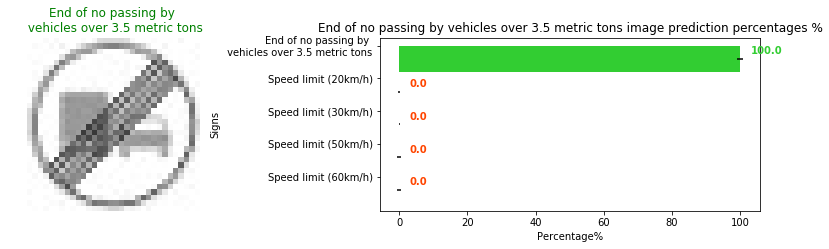

End of no passing by vehicles over 3.5 metric tons with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


In [110]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    k = 5
    show_top_k_predictions(k,
                           preprocessed_esp_test_images,
                           esp_test_images,
                           esp_test_images_labels,
                           esp_test_images_names,
                           sess)
        

#### UAE Top 5 Predictions

INFO:tensorflow:Restoring parameters from MoNet0.1.3


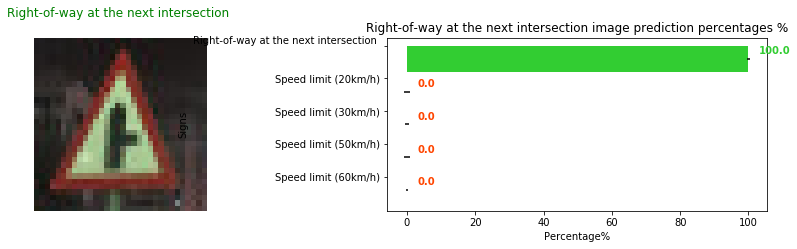

Right-of-way at the next intersection with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


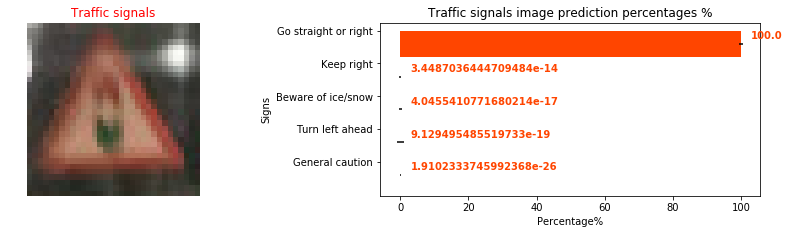

Go straight or right with 100.0%
Keep right with 3.4487036444709484e-14%
Beware of ice/snow with 4.0455410771680214e-17%
Turn left ahead with 9.129495485519733e-19%
General caution with 1.9102333745992368e-26%


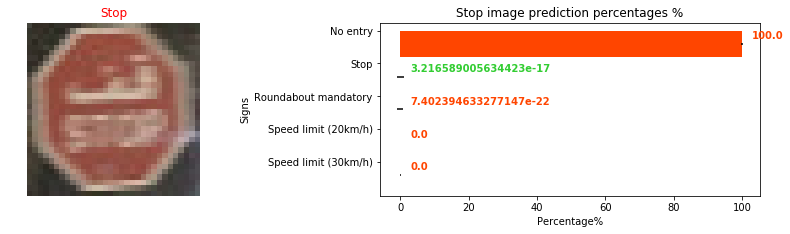

No entry with 100.0%
Stop with 3.216589005634423e-17%
Roundabout mandatory with 7.402394633277147e-22%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%


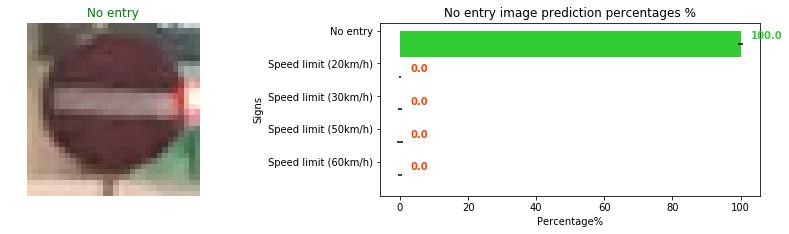

No entry with 100.0%
Speed limit (20km/h) with 0.0%
Speed limit (30km/h) with 0.0%
Speed limit (50km/h) with 0.0%
Speed limit (60km/h) with 0.0%


In [111]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    k = 5
    show_top_k_predictions(k,
                           preprocessed_uae_test_images,
                           uae_test_images,
                           uae_test_images_labels,
                           uae_test_images_names,
                           sess)
        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [566]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
import matplotlib.gridspec as gridspec
def outputFeatureMap(image_input,
                     tf_activation,
                     layer_name='Layer',
                     activation_min=-1,
                     activation_max=-1 ,
                     plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, training: False})
    print(activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(16,16))
    plt.suptitle(layer_name, fontsize=16)
    gs1 = gridspec.GridSpec(16, 16)
    gs1.update(wspace=0.025, hspace=0.05)
    for featuremap in range(featuremaps):
        cols = 8
        rows = featuremaps / cols
        plt.subplot(rows, cols, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('' + str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
#     plt.subplots_adjust(top=0.85)
    plt.show()

With some alteration we got the method above to work with the **MoNet** model and print the feature maps for our model's layers. We also need to remove the axis numbers with `plt.axis('off')` because we'll have a lot of filter images in the our figure, we'll also remove the feature labels for the higher layers due to their high number of features (filter)

### First Convolutional Layer

INFO:tensorflow:Restoring parameters from MoNet0.1.3
(1, 28, 28, 32)


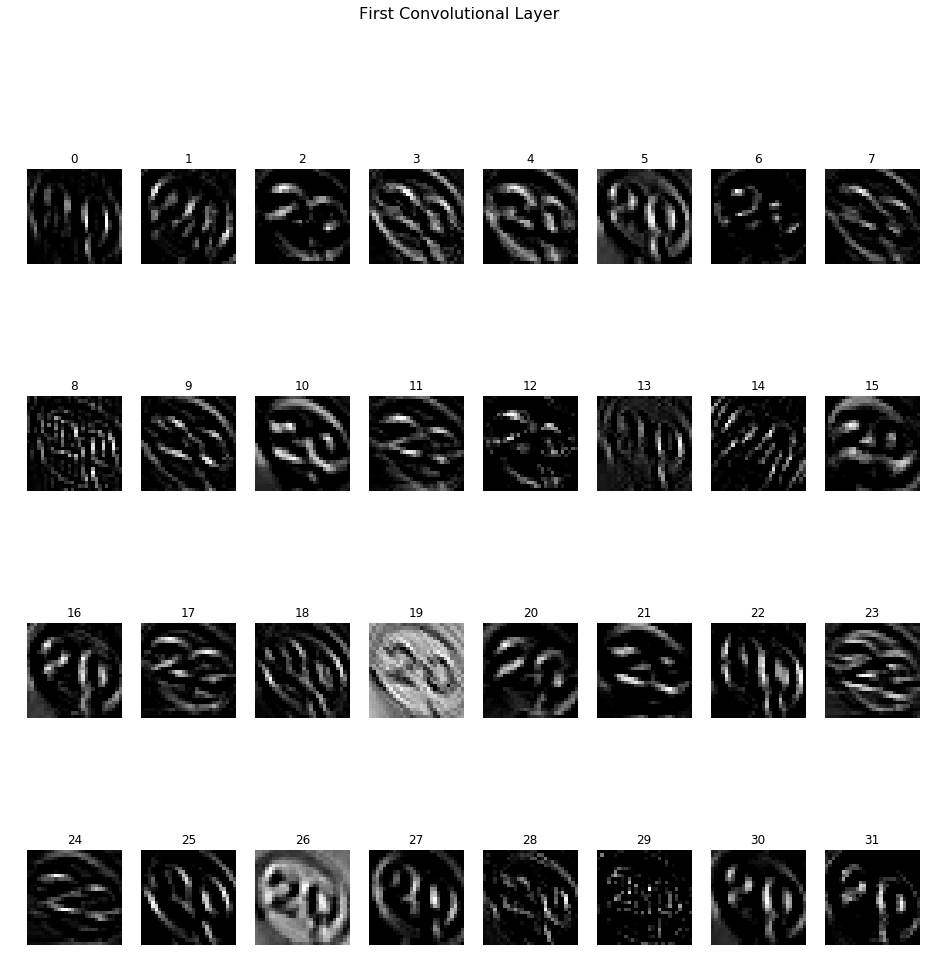

In [709]:
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    conv1 = tf.get_default_graph().get_tensor_by_name('conv1:0')
    outputFeatureMap([preprocessed_test_images[-2]], conv1, layer_name='First Convolutional Layer')

So here we have the `MoNet0.1.3` First Convolutional Layer resulting filters, we can see that the each of the 32 filters captures the curves and edges of the **Speed limit (20 km/h)**. Mainly the filters focus on the edges of the sign and the edges of the digits inside while ignoring whats outside all together. Some of the filters even capture the *graffiti* but not to a high degree, other filters like filter *17* is capturing some noisy representation of the sign. 

**Conclusion:** even with the image's perspective the networks first layer had no problem capturing the key sign features, and thats just the start.

### Second Convolutional Layer

INFO:tensorflow:Restoring parameters from MoNet0.1.3
(1, 10, 10, 64)


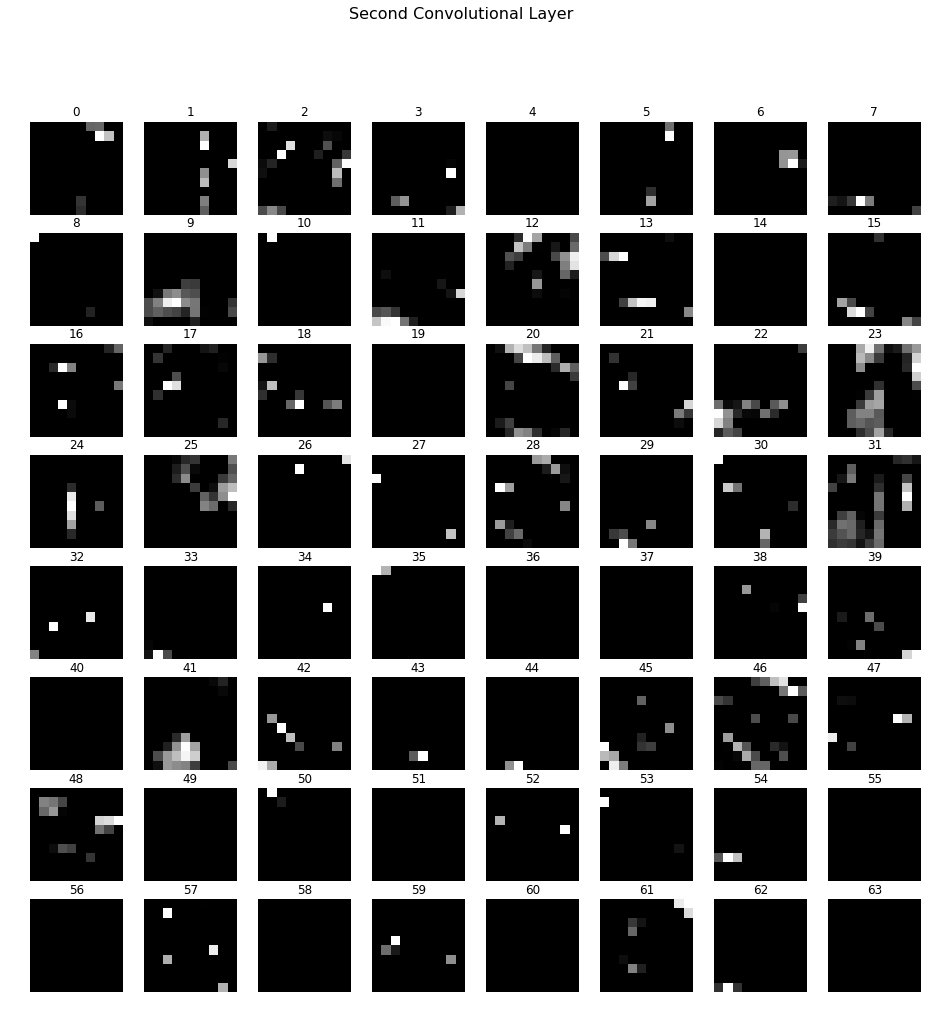

In [702]:
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    conv2 = tf.get_default_graph().get_tensor_by_name('conv2:0')
    outputFeatureMap([preprocessed_test_images[-2]], conv2, layer_name='Second Convolutional Layer')

Here in the `second layer` we have `64` filters and a `10x10` image, as we can see its really hard to clearly identify the features captured, but we can make out some features like the sign edges like in *41* which shows the lower edges and some filters contain the digit edges as in the case of *23*.

### Final Convolutional Layer

INFO:tensorflow:Restoring parameters from MoNet0.1.3
(1, 5, 5, 128)


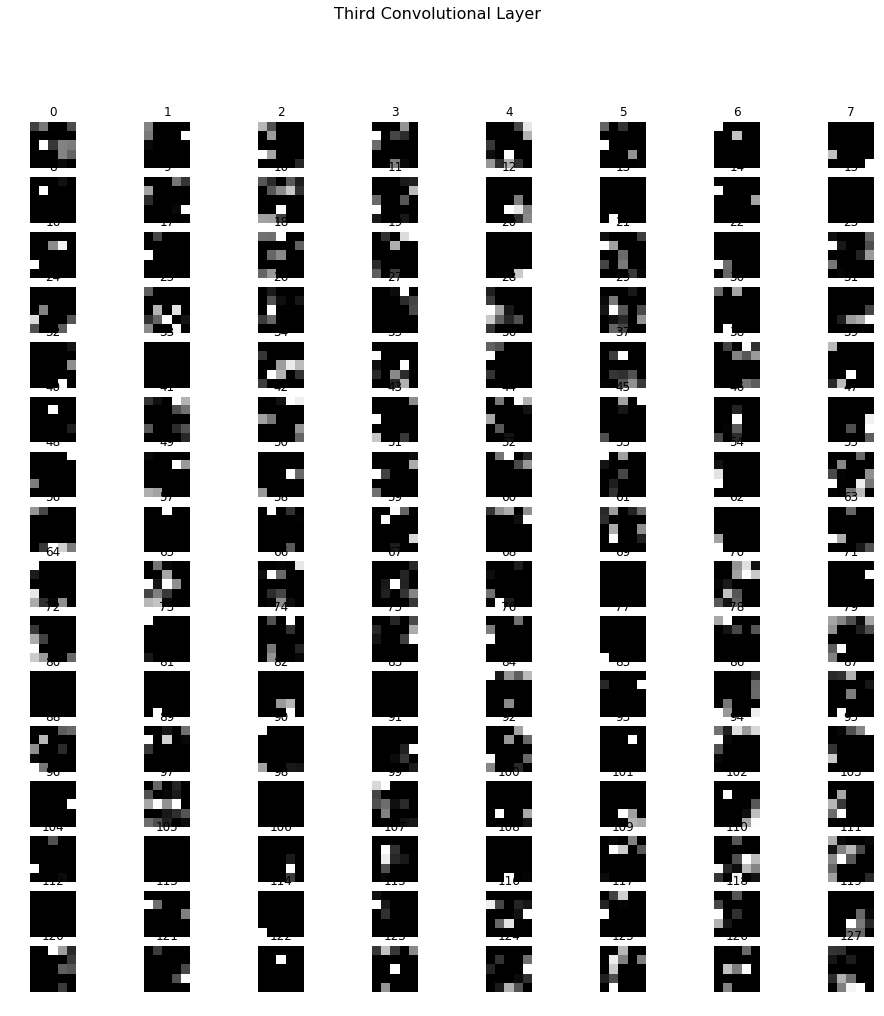

In [705]:
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    conv3 = tf.get_default_graph().get_tensor_by_name('conv3:0')
    outputFeatureMap([preprocessed_test_images[-2]], conv3, layer_name='Third Convolutional Layer')

As we dive deeper the features become human unreadable cause our image size decreases and our feature size increases; however, its obvious that our network is still capturing plenty of information in its `128` features. We might event still see some small resemblance to the sign's curved edges. 

### Just Show the Weights
Here we're going to show the weights values by providing a stimuli image of zeros.

**NOTE: This is for future work not the project submission**

(32, 32, 1)
INFO:tensorflow:Restoring parameters from ./MoNet0.1.5


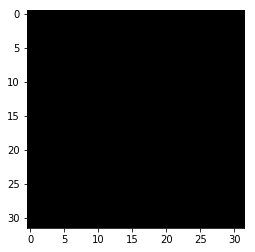

In [301]:
stimuli_image = np.random.random((32,32,3))
plt.imshow(, cmap='gray')
stimuli_image = imageutils.preprocess(stimuli_image, equalize=True, enhance=True)
# stimuli_image = imageutils.normalize_images([stimuli_image], global_mean, global_std)[0]#np.zeros((32,32,1))
print(stimuli_image.shape)
# plt.imshow(stimuli_image, cmap='gray')
with tf.Session() as sess:
    saver.restore(sess, chosen_version)
    conv1 = tf.get_default_graph().get_tensor_by_name('conv1:0')
    conv2 = tf.get_default_graph().get_tensor_by_name('conv2:0')
    conv3 = tf.get_default_graph().get_tensor_by_name('conv3:0')
#     plt.imshow(normalized_test_images[0], cmap='gray')    
#     outputFeatureMap([stimuli_image], conv1)
#     outputFeatureMap([normalized_test_images[0]], conv2)
#     outputFeatureMap([normalized_test_images[0]], conv3)